In [15]:
# !pip3 install numpy
# !pip3 install tasklogger
# !pip3 install joblib
# !pip3 install graphtools
# !pip3 install matplotlib
# !pip3 install pandas

In [18]:
import harmonicalignment
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

In [32]:
data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)

In [56]:
data[0]

array([[  2.1309445 ,   5.57832746,  -4.60535952],
       [  2.88803588,  11.49520475,   6.90423948],
       [  4.21360498,   7.638065  ,  13.35193595],
       ...,
       [  4.47235631,  18.25807442,   5.4805226 ],
       [  1.5383873 ,  15.54499681, -10.90552967],
       [ 12.13740174,   6.76557648,  -2.42831634]])

In [24]:
data[0].shape

(100, 3)

In [25]:
data[1].shape

(100,)

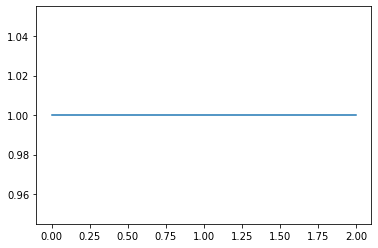

In [110]:
from scipy.stats import zscore
def normalize(X): # 默认是对每一列单独标准化 mean=0 std=1
    _X=X.copy()
    _X = zscore(_X, axis=0)
    _X[np.isnan(_X)]=0
    return _X
t=data[0]
t=normalize(t)
plt.plot(np.std(t,axis=0))

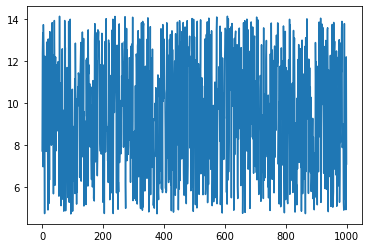

In [60]:
plt.plot(data[1])

/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_19397/3363662660.py:21: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


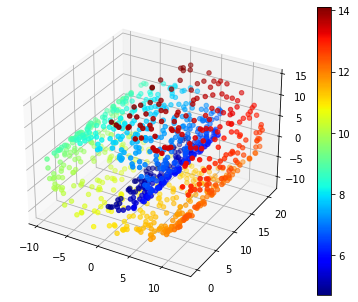

In [69]:
# def ThreeDPlot(x,y,z,c=None):
#     from mpl_toolkits.mplot3d import Axes3D
#     import matplotlib.pyplot as plt
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     ax.scatter(x, y, z, c='r', marker='o',s=2,cmap=c)
#     ax.set_xlabel('X Label')
#     ax.set_ylabel('Y Label')
#     ax.set_zlabel('Z Label')
#     plt.show()
# ThreeDPlot(data[0][:,0],data[0][:,1],data[0][:,2],c=data[1])
    
import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()
    
data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)    
scatter3d(data[0][:,0],data[0][:,1],data[0][:,2],data[1])

In [97]:
x1=data[0][:500,:]
label1=data[1][:500]
x2=data[0][500:,:]
label2=data[1][500:]
x=data[0]
label=data[1]


/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_19397/3363662660.py:21: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


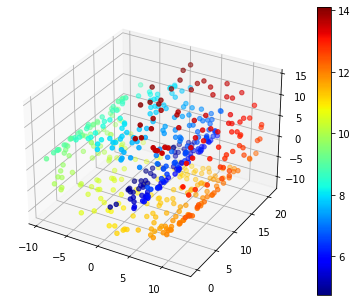

In [98]:
scatter3d(x1[:,0],x1[:,1],x1[:,2],label1)

/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_19397/3363662660.py:21: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


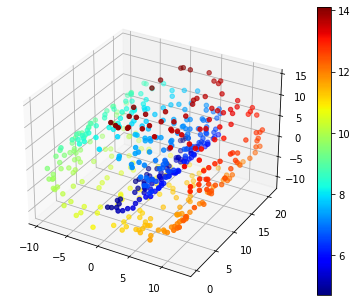

In [99]:
scatter3d(x2[:,0],x2[:,1],x2[:,2],label2)

In [100]:
ha_op = harmonicalignment.HarmonicAlignment(n_filters=4)
ha_op.align(x1, x2)
XY_aligned = ha_op.diffusion_map()

xb1_aligned=XY_aligned[:500]
xb2_aligned=XY_aligned[500:]

/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


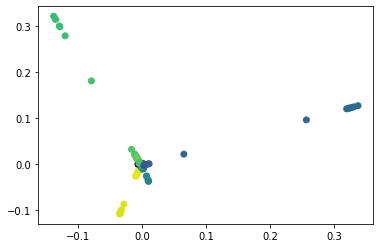

In [101]:
plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)

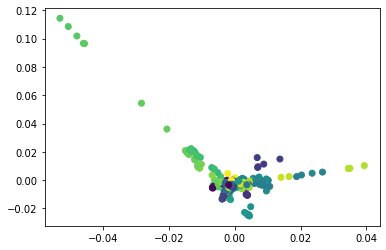

In [102]:
plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)

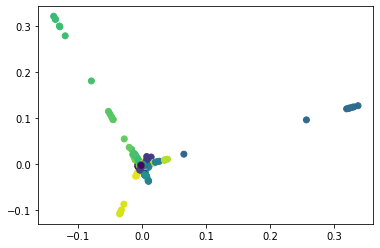

In [103]:
plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label)

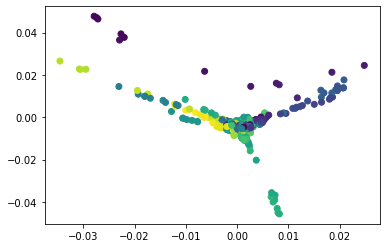

In [96]:
plt.scatter(XY_aligned[500:,0],XY_aligned[500:,1],c=label[500:])

/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_19397/3363662660.py:21: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


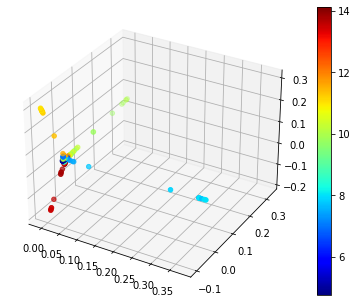

In [80]:
# xb2_aligned.shape
scatter3d(xb1_aligned[:,0],xb1_aligned[:,1],xb1_aligned[:,2],label1)

/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_19397/3363662660.py:21: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


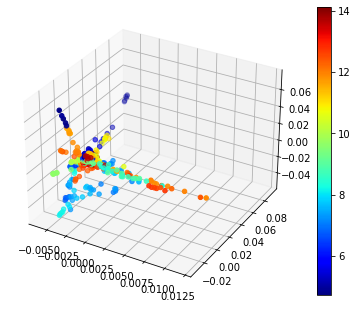

In [82]:
scatter3d(xb2_aligned[:,0],xb2_aligned[:,1],xb2_aligned[:,2],label2)

/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_19397/3363662660.py:21: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


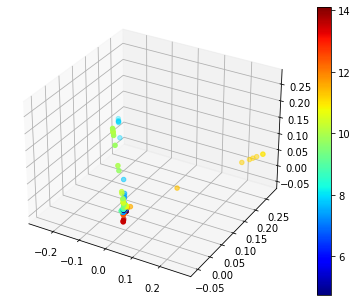

In [87]:
# xb2_aligned.shape
scatter3d(xb1_aligned[:,0],xb1_aligned[:,1],xb1_aligned[:,2],label1)

/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_19397/3363662660.py:21: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


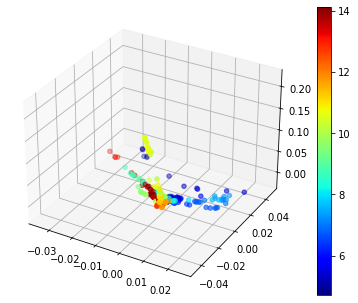

In [88]:
scatter3d(xb2_aligned[:,0],xb2_aligned[:,1],xb2_aligned[:,2],label2)

/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_2540/3778138957.py:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


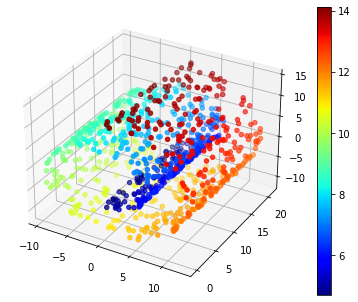

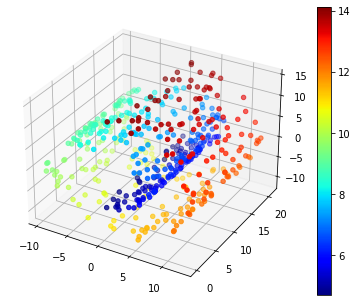

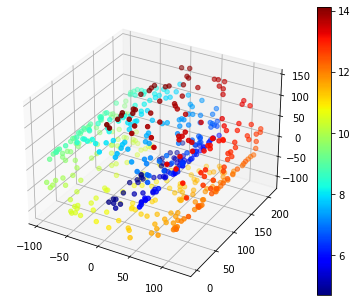

/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


Text(0.5, 1.0, 'x1x2 aligned')

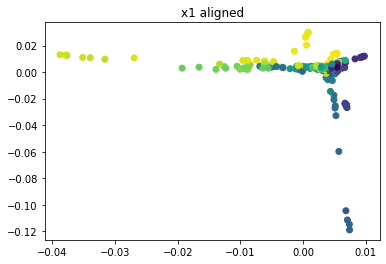

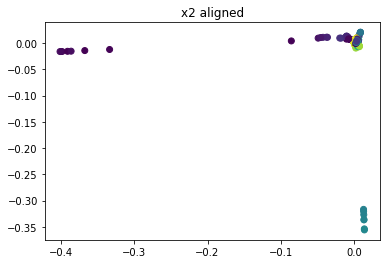

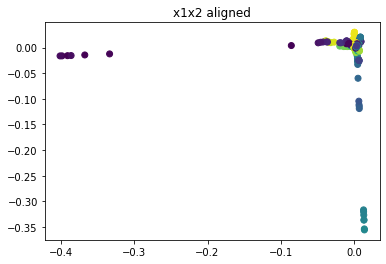

In [1]:
import harmonicalignment
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D

data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)

def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()
    
data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)    
scatter3d(data[0][:,0],data[0][:,1],data[0][:,2],data[1])


# 分割数据成为x1 和 x2
x1=data[0][:500,:]
label1=data[1][:500]
x2=data[0][500:,:]*10
label2=data[1][500:]
x=data[0]
label=data[1]

# 分别作图验证
scatter3d(x1[:,0],x1[:,1],x1[:,2],label1)
scatter3d(x2[:,0],x2[:,1],x2[:,2],label2)

from scipy.stats import zscore
def normalize(X): # 默认是对每一列单独标准化 mean=0 std=1
    _X=X.copy()
    _X = zscore(_X, axis=0)
    _X[np.isnan(_X)]=0
    return _X

# 运行协调对齐
x1=normalize(x1)
x2=normalize(x2)
ha_op = harmonicalignment.HarmonicAlignment(n_filters=4)
ha_op.align(x1, x2)
XY_aligned = ha_op.diffusion_map()

xb1_aligned=XY_aligned[:500]
xb2_aligned=XY_aligned[500:]

# 分别作图
plt.figure()
plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
plt.title('x1 aligned')
plt.figure()
plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
plt.title('x2 aligned')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
plt.title('x1x2 aligned')

/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_2540/3832474363.py:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


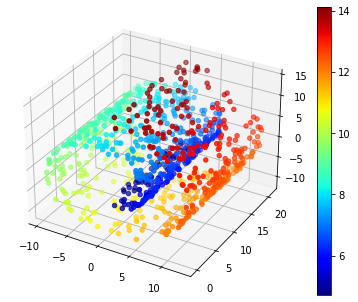

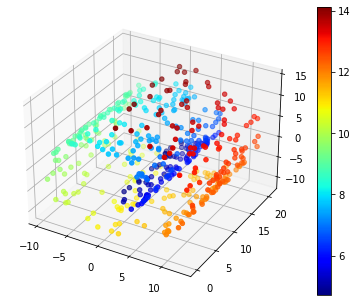

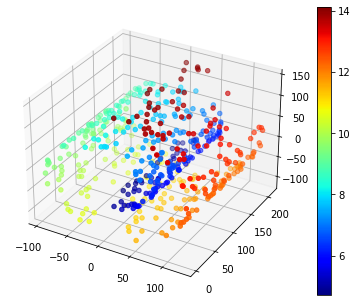

/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


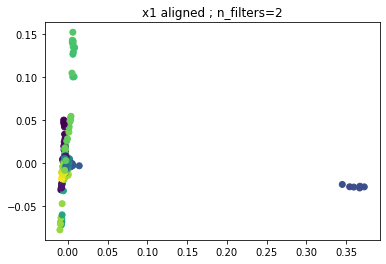

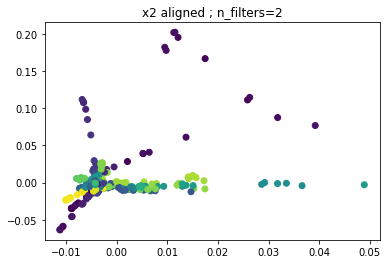

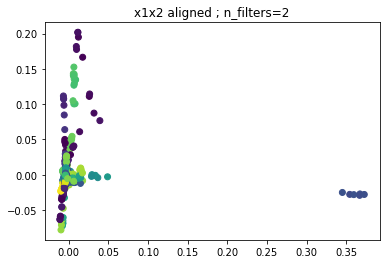

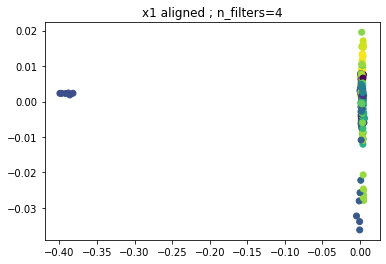

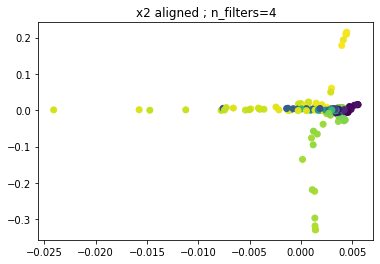

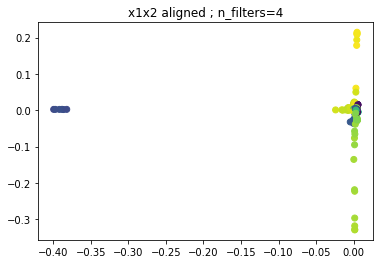

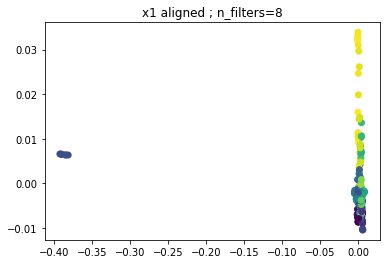

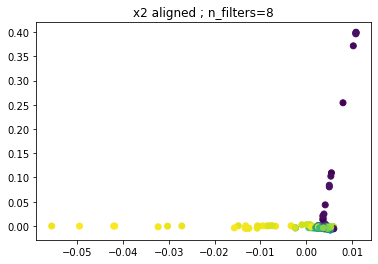

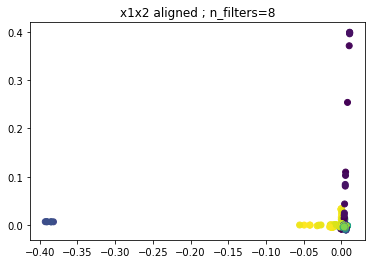

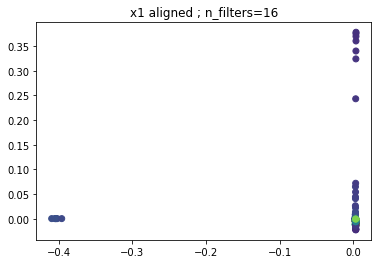

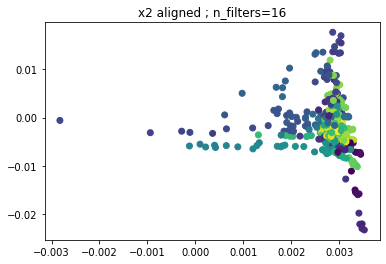

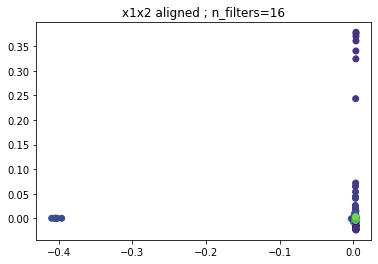

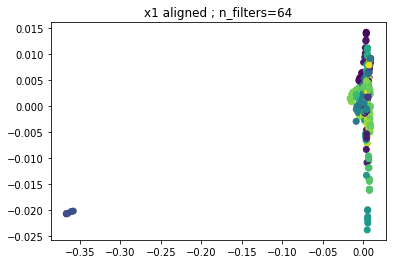

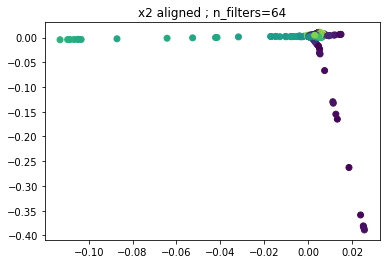

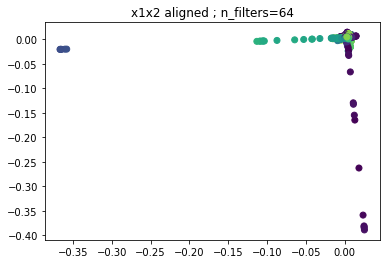

In [3]:
import harmonicalignment
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D

data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)

def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()
    
data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)    
scatter3d(data[0][:,0],data[0][:,1],data[0][:,2],data[1])


# 分割数据成为x1 和 x2
x1=data[0][:500,:]
label1=data[1][:500]
x2=data[0][500:,:]*10
label2=data[1][500:]
x=data[0]
label=data[1]

# 分别作图验证
scatter3d(x1[:,0],x1[:,1],x1[:,2],label1)
scatter3d(x2[:,0],x2[:,1],x2[:,2],label2)

from scipy.stats import zscore
def normalize(X): # 默认是对每一列单独标准化 mean=0 std=1
    _X=X.copy()
    _X = zscore(_X, axis=0)
    _X[np.isnan(_X)]=0
    return _X

# 运行协调对齐
x1=normalize(x1)
x2=normalize(x2)

# scale of wavelets(eg n_filters) to use 要使用的小波规模（例如n_filters）。
wavelet_scales = [2, 4, 8, 16, 64]

for n_filters in wavelet_scales:
    ha_op = harmonicalignment.HarmonicAlignment(n_filters=n_filters)
    ha_op.align(x1, x2)
    XY_aligned = ha_op.diffusion_map()

    xb1_aligned=XY_aligned[:500]
    xb2_aligned=XY_aligned[500:]

    # 分别作图
    plt.figure()
    plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
    plt.title(f'x1 aligned ; n_filters={n_filters}')
    plt.figure()
    plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
    plt.title(f'x2 aligned ; n_filters={n_filters}')
    plt.figure()
    plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
    plt.title(f'x1x2 aligned ; n_filters={n_filters}')
    # 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
    # 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合


In [124]:
# we use this script in the paper to make the corruption experiment. 我们在论文中使用这个脚本来做腐败实验。
from sklearn import datasets, decomposition, neighbors
from sklearn.utils.extmath import randomized_svd
from scipy import stats, sparse
import scipy
import graphtools
import numpy as np

from shutil import copyfileobj
from six.moves import urllib
import os


def randPCA(X, n_components=None):
    pca_op = decomposition.PCA(n_components)
    U, S, VT = pca_op._fit(X)
    return U, S, VT.T


def randSVD(X, n_components=None):
    if n_components is None:
        n_components = min(X.shape)
    U, S, VT = randomized_svd(X, n_components)
    return U, S, VT.T


def knnclassifier(X, X_labels, Y, Y_labels, knn):
    knn_op = neighbors.KNeighborsClassifier(knn)
    knn_op.fit(X, X_labels)
    return knn_op.score(Y, Y_labels)


def diffusionCoordinates(X, decay, knn, n_pca):
    # diffusion maps with normalized Laplacian
    # n_pca = 0 corresponds to NO pca
    G = graphtools.Graph(X, knn=knn, decay=decay, n_pca=n_pca, use_pygsp=True, thresh=0)
    n_samples = X.shape[0]
    W = G.W.tocoo()
    # W / (DD^T)
    W.data = W.data / (G.dw[W.row] * G.dw[W.col])
    # this is the anisotropic kernel
    nsqrtD = sparse.dia_matrix((np.array(np.sum(W, 0)) ** (-0.5), [0]), W.shape)
    L = sparse.eye(n_samples) - nsqrtD @ W @ nsqrtD
    U, S, _ = randSVD(L)
    # smallest to largest
    S_idx = np.argsort(S)
    U, S = U[:, S_idx], S[S_idx]
    #  trim trivial information
    U, S = U[:, 1:], S[1:]
    return U, S


def itersine(x):
    return np.sin(0.5 * np.pi * (np.cos(np.pi * x)) ** 2) * ((x >= -0.5) & (x <= 0.5))


def wavelet(loc, scale, overlap):
    def wavelet_i(x):
        return itersine(x / scale - loc / overlap + 1 / 2) * np.sqrt(2 / overlap)

    return wavelet_i


def build_wavelets(lmbda, n_filters, overlap):
    lambda_max = max(lmbda)
    # maximum laplacian eigenvalue
    scale = lambda_max / (n_filters - overlap + 1) * (overlap)
    # response evaluation... this is the money
    lambda_filt = np.zeros((len(lmbda), n_filters))
    for i in range(n_filters):
        filter_i = wavelet(loc=i + 1, scale=scale, overlap=overlap)
        lambda_filt[:, i] = filter_i(lmbda)
    return lambda_filt


np.random.seed(42)
digits = datasets.fetch_openml("mnist_784")
labels = digits["target"]
# imgs = digits["data"]
imgs = np.asarray(digits["data"])

n_samples = 1000
n_features = 784
n_iters = 1
n_percentages = 3
n_wavelets = 2

colreplace_probs = np.linspace(0, 1, n_percentages) if n_percentages > 1 else [1]
# scale of wavelets(eg n_filters) to use
wavelet_scales = [2, 8, 16, 64]
# kernel params
knn_1 = 20
decay_1 = 20
pca_1 = 100
knn_2 = knn_1
decay_2 = decay_1
pca_2 = pca_1
# Z = transformed
knn_transform = 10
decay_transform = 10
pca_transform = None
# diffusion time for final embedding
diffusion_t = 1
#
output = np.zeros((n_percentages, n_iters, n_wavelets, 2))
# store metrics in here
##

for p in range(n_percentages):
    # build random matrix and replace prct of columns with I
    pct = colreplace_probs[p]
    random_rotation = stats.ortho_group.rvs(n_features)
    # random orthogonal rotation
    colReplace = np.random.choice(
        n_features, np.floor(pct * n_features).astype(int), replace=False
    )
    random_rotation[:, colReplace] = np.eye(n_features)[:, colReplace]
    for iter_idx in range(n_iters):
        #  sample two sets of digits from MNIST
        sample_idx = np.random.choice(len(labels), n_samples * 2, replace=False)
        X1_idx = sample_idx[:n_samples]
        X2_idx = sample_idx[n_samples:]
        #  slice the digits
        X1 = imgs[X1_idx, :]
        X2 = imgs[X2_idx, :]
        #  transform X2
        X2_rotate = X2 @ random_rotation.T
        X_combined = np.vstack([X1, X2_rotate])
        U_combined, S_combined = diffusionCoordinates(X_combined, decay_1, knn_1, pca_1)
        # this is for evaluating unaligned data.  You can also ploit this.
        #  slice the labels
        X1_labels = labels[X1_idx]
        X2_labels = labels[X2_idx]
        combined_labels = np.concatenate([X1_labels, X2_labels])
        #  run pca and classify
        DM_combined = U_combined @ np.diag(np.exp(-S_combined))
        beforeprct = knnclassifier(
            DM_combined[:n_samples, :],
            X1_labels,
            DM_combined[n_samples:, :],
            X2_labels,
            5,
        )
        #  construct graphs
        U1, S1 = diffusionCoordinates(X1, decay_1, knn_1, pca_1)
        # normalized L with diffusion coordinates for sample 1
        U2, S2 = diffusionCoordinates(X2_rotate, decay_2, knn_2, pca_2)
        # ... sample 2
        #  get fourier coefficients
        X1_fourier = U1.T @ X1
        X2_rotate_fourier = U2.T @ X2_rotate
        for scale_idx in range(n_wavelets):
            n_filters = wavelet_scales[scale_idx]
            #  build wavelets
            wavelet_1 = build_wavelets(S1, n_filters, 2)
            wavelet_2 = build_wavelets(S2, n_filters, 2)
            # wavelet_1 is the filter evaluated over the eigenvalues.  So we
            # can pointwise multiply each wavelet_1 / 2 by the fourier
            # coefficients
            #  evaluate wavelets over data in the spectral domain
            #  stolen from gspbox, i have no idea how the fuck this works
            wavelet_1_spectral = np.conj(wavelet_1)[:, :, None] * X1_fourier[:, None, :]
            wavelet_2_spectral = (
                np.conj(wavelet_2)[:, :, None] * X2_rotate_fourier[:, None, :]
            )
            #  correlate the spectral domain wavelet coefficients.
            blocks = np.zeros(
                (wavelet_1_spectral.shape[0], n_filters, wavelet_2_spectral.shape[0])
            )
            for i in range(n_filters):  # for each filter, build a correlation
                blocks[:, i, :] = (
                    wavelet_1_spectral[:, i, :] @ wavelet_2_spectral[:, i, :].T
                )
            #  construct transformation matrix
            transform = np.sum(blocks, axis=1)
            # sum wavelets up
            Ut, St, Vt = randPCA(transform)
            # this is random svd
            St = St[St > 0]
            # this is from earlier experiments where I was truncating by rank.
            #  We can probably remove this.
            transform_rank = len(St)
            Ut = Ut[:, :transform_rank]
            Vt = Vt[:, :transform_rank]
            transform_orth = Ut @ Vt.T
            # the orthogonal transformation matrix
            #  compute transformed data
            U1_transform = U1 @ transform_orth
            # U1 in span(U2)
            U2_transform = U2 @ transform_orth.T
            #  U2 in span(U1)
            E = np.vstack(
                [np.hstack([U1, U1_transform]), np.hstack([U2_transform, U2])]
            )
            X = E @ np.diag(np.exp(-diffusion_t * np.concatenate([S1, S2])))
            U_transform, S_transform = diffusionCoordinates(
                X, decay_transform, knn_transform, pca_transform
            )
            Z = U_transform @ np.diag(np.exp(-S_transform))
            afterprct = knnclassifier(
                Z[:n_samples, :], X1_labels, Z[n_samples:, :], X2_labels, 5
            )
            output[p, iter_idx, scale_idx, 0] = beforeprct
            output[p, iter_idx, scale_idx, 1] = afterprct

print(output)


[[[[0.095 0.154]
   [0.095 0.164]]]


 [[[0.094 0.823]
   [0.094 0.817]]]


 [[[0.901 0.845]
   [0.901 0.838]]]]


In [125]:
# we use this script in the paper to make the corruption experiment.
from sklearn import datasets, neighbors
from scipy import stats
import numpy as np
import harmonicalignment
import harmonicalignment.math

from shutil import copyfileobj
from six.moves import urllib
import os


def knnclassifier(X, X_labels, Y, Y_labels, knn): #输出的是测试的准确率
    knn_op = neighbors.KNeighborsClassifier(knn)
    knn_op.fit(X, X_labels)
    return knn_op.score(Y, Y_labels)


np.random.seed(42)
digits = datasets.fetch_openml("mnist_784")
labels = digits["target"]
# imgs = digits["data"]
imgs = np.asarray(digits["data"])

n_samples = 1000
n_features = 784
n_iters = 1
n_percentages = 3
n_wavelets = 2

colreplace_probs = np.linspace(0, 1, n_percentages) if n_percentages > 1 else [1]
# scale of wavelets(eg n_filters) to use 要使用的小波规模（例如n_filters）。
wavelet_scales = [2, 8, 16, 64]
# kernel params 内核参数
knn_1 = 20
decay_1 = 20
pca_1 = 100
knn_2 = knn_1
decay_2 = decay_1
pca_2 = pca_1
# Z = transformed
knn_transform = 10
decay_transform = 10
pca_transform = None
# diffusion time for final embedding 最终嵌入的扩散时间
diffusion_t = 1
#
output = np.zeros((n_percentages, n_iters, n_wavelets, 2))
# store metrics in here 在这里存储指标
##

for p in range(n_percentages):
    # build random matrix and replace prct of columns with I 构建随机矩阵，用I替换各列的prct
    pct = colreplace_probs[p]
    random_rotation = stats.ortho_group.rvs(n_features)
    # random orthogonal rotation 随机正交旋转
    colReplace = np.random.choice(
        n_features, np.floor(pct * n_features).astype(int), replace=False
    )
    random_rotation[:, colReplace] = np.eye(n_features)[:, colReplace]
    for iter_idx in range(n_iters):
        #  sample two sets of digits from MNIST 从MNIST中抽取两组数字
        sample_idx = np.random.choice(len(labels), n_samples * 2, replace=False)
        X1_idx = sample_idx[:n_samples]
        X2_idx = sample_idx[n_samples:]
        #  slice the digits 分割数字
        X1 = imgs[X1_idx, :]
        X2 = imgs[X2_idx, :]
        #  transform X2 转化X2
        X2_rotate = X2 @ random_rotation.T # 这里的rotation完全就是单位矩阵。
        print(f"np.sum((X2_rotate != X2)*1)={np.sum((X2_rotate != X2)*1)}")
        X_combined = np.vstack([X1, X2_rotate])
        U_combined, S_combined = harmonicalignment.math.diffusionCoordinates(
            X_combined, decay_1, knn_1, pca_1
        )
        # this is for evaluating unaligned data.  You can also plot this. 这是为评估不对齐的数据。 你也可以绘制这个。
        #  slice the labels 切分标签
        X1_labels = labels[X1_idx]
        X2_labels = labels[X2_idx]
        combined_labels = np.concatenate([X1_labels, X2_labels])
        #  run pca and classify 运行PCA并且分类
        DM_combined = U_combined @ np.diag(np.exp(-S_combined))
        beforeprct = knnclassifier(
            DM_combined[:n_samples, :],
            X1_labels,
            DM_combined[n_samples:, :],
            X2_labels,
            5,
        )
        for scale_idx in range(n_wavelets):
            n_filters = wavelet_scales[scale_idx]
            align_op = harmonicalignment.HarmonicAlignment(
                n_filters,
                t=diffusion_t,
                overlap=2,
                verbose=1,
                knn_X=knn_1,
                knn_Y=knn_2,
                knn_XY=knn_transform,
                decay_X=decay_1,
                decay_Y=decay_2,
                decay_XY=decay_transform,
                n_pca_X=pca_1,
                n_pca_Y=pca_2,
                n_pca_XY=pca_transform,
            )
            align_op.align(X1, X2_rotate)
            Z = align_op.diffusion_map()
            afterprct = knnclassifier(
                Z[:n_samples, :], X1_labels, Z[n_samples:, :], X2_labels, 5
            )
            output[p, iter_idx, scale_idx, 0] = beforeprct
            output[p, iter_idx, scale_idx, 1] = afterprct

print(output)


np.sum((X2_rotate != X2)*1)=784000
Calculating Harmonic Alignment...
  Calculating diffusion coordinates...
Calculating PCA...
Calculated PCA in 0.17 seconds.
Calculating KNN search...
Calculated KNN search in 0.14 seconds.
Calculating affinities...
Calculated affinities in 0.05 seconds.
    Calculating eigendecomposition...
    Calculated eigendecomposition in 0.27 seconds.
Calculating PCA...
Calculated PCA in 0.12 seconds.
Calculating KNN search...
Calculated KNN search in 0.14 seconds.
Calculating affinities...
Calculated affinities in 0.03 seconds.
    Calculating eigendecomposition...
    Calculated eigendecomposition in 0.25 seconds.
  Calculated diffusion coordinates in 1.37 seconds.
  Calculating wavelets...
  Calculated wavelets in 1.92 seconds.
  Calculating transformed data...
    Calculating graph Laplacian...
Calculating PCA...
Calculated PCA in 0.68 seconds.
Calculating KNN search...
Calculated KNN search in 0.48 seconds.
Calculating affinities...
Calculated affinities in

In [127]:
wavelet_scales

[2, 8, 16, 64]

In [8]:
import numpy as np
from scipy.stats import ortho_group
d = 6
seed = 1
size = 2
a, b = np.float32(ortho_group.rvs(size=size, dim=d, random_state=seed))
print(a)
print(np.linalg.det(a))
print(a @ a.T)

[[ 0.5015471  -0.5820328  -0.05333719 -0.48984686  0.25217542  0.3214049 ]
 [-0.18889126 -0.64355975 -0.54324335  0.4444516  -0.20702398 -0.1210017 ]
 [-0.16308293  0.3759225  -0.75086087 -0.1850418   0.451174    0.17463031]
 [-0.3312992  -0.00264413 -0.16431205 -0.6506431  -0.6631098   0.01357709]
 [ 0.26721084 -0.0011341  -0.13640606 -0.24612936  0.12310301 -0.9133764 ]
 [-0.71064323 -0.32518092  0.3043759  -0.21060923  0.4848935  -0.13084698]]
-0.99999994
[[ 1.0000000e+00 -3.5822648e-08 -9.6641104e-09  7.1909207e-09
   4.2401709e-08 -2.0740941e-08]
 [-3.5822648e-08  9.9999994e-01  1.0107148e-09  1.1673144e-08
  -1.5248061e-08 -4.5776645e-09]
 [-9.6641104e-09  1.0107148e-09  1.0000000e+00  1.7729160e-08
   1.5460818e-08  2.2110754e-08]
 [ 7.1909207e-09  1.1673144e-08  1.7729160e-08  9.9999994e-01
  -7.2825377e-09  1.6358136e-08]
 [ 4.2401709e-08 -1.5248061e-08  1.5460818e-08 -7.2825377e-09
   1.0000000e+00 -3.2517278e-09]
 [-2.0740941e-08 -4.5776645e-09  2.2110754e-08  1.6358136e-08


In [9]:
a

array([[ 0.5015471 , -0.5820328 , -0.05333719, -0.48984686,  0.25217542,
         0.3214049 ],
       [-0.18889126, -0.64355975, -0.54324335,  0.4444516 , -0.20702398,
        -0.1210017 ],
       [-0.16308293,  0.3759225 , -0.75086087, -0.1850418 ,  0.451174  ,
         0.17463031],
       [-0.3312992 , -0.00264413, -0.16431205, -0.6506431 , -0.6631098 ,
         0.01357709],
       [ 0.26721084, -0.0011341 , -0.13640606, -0.24612936,  0.12310301,
        -0.9133764 ],
       [-0.71064323, -0.32518092,  0.3043759 , -0.21060923,  0.4848935 ,
        -0.13084698]], dtype=float32)

In [10]:
a@a.T

array([[ 1.0000000e+00, -3.5822648e-08, -9.6641104e-09,  7.1909207e-09,
         4.2401709e-08, -2.0740941e-08],
       [-3.5822648e-08,  9.9999994e-01,  1.0107148e-09,  1.1673144e-08,
        -1.5248061e-08, -4.5776645e-09],
       [-9.6641104e-09,  1.0107148e-09,  1.0000000e+00,  1.7729160e-08,
         1.5460818e-08,  2.2110754e-08],
       [ 7.1909207e-09,  1.1673144e-08,  1.7729160e-08,  9.9999994e-01,
        -7.2825377e-09,  1.6358136e-08],
       [ 4.2401709e-08, -1.5248061e-08,  1.5460818e-08, -7.2825377e-09,
         1.0000000e+00, -3.2517278e-09],
       [-2.0740941e-08, -4.5776645e-09,  2.2110754e-08,  1.6358136e-08,
        -3.2517278e-09,  1.0000000e+00]], dtype=float32)

In [15]:
colReplace=[1,2,3]

colReplace = np.random.choice(
        6, 3, replace=False
    )
a[:,colReplace]=np.eye(6)[:,colReplace]

In [16]:
a

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.25217542,
         0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        , -0.20702398,
         0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.451174  ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        , -0.6631098 ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.12310301,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.4848935 ,
         1.        ]], dtype=float32)

In [17]:
a@a.T

array([[ 1.0635924 , -0.05220636,  0.11377499, -0.16721998,  0.03104355,
         0.12227822],
       [-0.05220636,  1.042859  , -0.09340383,  0.13727963, -0.02548527,
        -0.10038458],
       [ 0.11377499, -0.09340383,  1.203558  , -0.29917789,  0.05554087,
         0.21877134],
       [-0.16721998,  0.13727963, -0.29917789,  1.4397146 , -0.08163081,
        -0.3215376 ],
       [ 0.03104355, -0.02548527,  0.05554087, -0.08163081,  0.01515435,
         0.05969185],
       [ 0.12227822, -0.10038458,  0.21877134, -0.3215376 ,  0.05969185,
         1.2351217 ]], dtype=float32)

In [24]:
# we use this script in the paper to make the corruption experiment.
from sklearn import datasets, neighbors
from scipy import stats
import numpy as np
import harmonicalignment
import harmonicalignment.math

from shutil import copyfileobj
from six.moves import urllib
import os


def knnclassifier(X, X_labels, Y, Y_labels, knn): #输出的是测试的准确率
    knn_op = neighbors.KNeighborsClassifier(knn)
    knn_op.fit(X, X_labels)
    return knn_op.score(Y, Y_labels)


np.random.seed(42)
digits = datasets.fetch_openml("mnist_784")
labels = digits["target"]
# imgs = digits["data"]
imgs = np.asarray(digits["data"])

n_samples = 1000
n_features = 784
n_iters = 1
n_percentages = 3
n_wavelets = 4

colreplace_probs = np.linspace(0, 1, n_percentages) if n_percentages > 1 else [1]
# scale of wavelets(eg n_filters) to use 要使用的小波规模（例如n_filters）。
wavelet_scales = [2, 8, 16, 64]
# kernel params 内核参数
knn_1 = 20
decay_1 = 20
pca_1 = 100
knn_2 = knn_1
decay_2 = decay_1
pca_2 = pca_1
# Z = transformed
knn_transform = 10
decay_transform = 10
pca_transform = None
# diffusion time for final embedding 最终嵌入的扩散时间
diffusion_t = 1

output = np.zeros((n_percentages, n_iters, n_wavelets, 2))
# store metrics in here 在这里存储指标


# 在一系列的概率分布[0. , 0.5, 1. ]中选一个，使用这一个比例从总共的 784 的n_features的列 不进行旋转； 当pct=0的时候完全不正交旋转，当pct=1的时候所有行正交旋转。
p=0
# build random matrix and replace prct of columns with I 构建随机矩阵，用I替换各列的prct
pct = colreplace_probs[p] # array([0. , 0.5, 1. ]) p=0,1,2
random_rotation = stats.ortho_group.rvs(n_features) # 返回一个随机的正交矩阵，从O(N) Haar分布（O(N)上唯一的均匀分布）抽取一个比例的列变成单位矩阵的对应列。
# random orthogonal rotation 随机正交旋转
colReplace = np.random.choice(
    n_features, np.floor(pct * n_features).astype(int), replace=False
)
random_rotation[:, colReplace] = np.eye(n_features)[:, colReplace]

In [25]:
random_rotation

array([[ 0.01797858, -0.00298647,  0.07830813, ...,  0.00346121,
        -0.02878123,  0.0515452 ],
       [-0.00500448, -0.02004179,  0.04393971, ...,  0.01653849,
        -0.02984586, -0.04754432],
       [ 0.0234431 , -0.03879157,  0.02238425, ...,  0.00416606,
         0.00397744, -0.03069388],
       ...,
       [-0.04833281, -0.02625825, -0.02011011, ..., -0.0262052 ,
         0.00813484,  0.03818189],
       [ 0.01376127,  0.01003918, -0.03098189, ...,  0.05037073,
         0.01206857, -0.00350379],
       [ 0.02210016, -0.00246502,  0.02720569, ...,  0.02275138,
        -0.0026096 , -0.01328239]])

In [26]:
np.min(random_rotation@random_rotation.T)

-4.414871246360974e-16

In [27]:
np.max(random_rotation@random_rotation.T)

1.0000000000000038

In [54]:

# build random matrix and replace prct of columns with I 构建随机矩阵，用I替换各列的prct
pct = 0.5 #colreplace_probs[p] # array([0. , 0.5, 1. ]) p=0,1,2
random_rotation = stats.ortho_group.rvs(n_features) # 返回一个随机的正交矩阵，从O(N) Haar分布（O(N)上唯一的均匀分布）抽取一个比例的列变成单位矩阵的对应列。
# random orthogonal rotation 随机正交旋转
colReplace = np.random.choice(
    n_features, np.floor(pct * n_features).astype(int), replace=False
)
random_rotation[:, colReplace] = np.eye(n_features)[:, colReplace]

sample_idx = np.random.choice(len(labels), n_samples * 2, replace=False)
X1_idx = sample_idx[:n_samples]
X2_idx = sample_idx[n_samples:]
#  slice the digits 分割数字
X1 = imgs[X1_idx, :]
X2 = imgs[X2_idx, :]
#  transform X2 转化X2
X2_rotate = X2 @ random_rotation.T 
print(f"LA.norm(X2)={LA.norm(X2)}")
print(f"LA.norm(X2_rotate)={LA.norm(X2_rotate)}")

LA.norm(X2_rotate)=76557.05906054647
LA.norm(X2_rotate)=76556.56327367183


In [45]:
np.max(random_rotation@random_rotation.T)

1.5765140791777035

In [46]:
np.min(random_rotation@random_rotation.T)

-0.0817255503318954

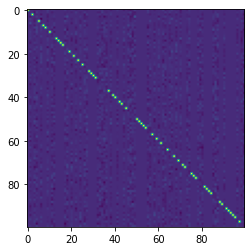

In [47]:
plt.imshow(random_rotation[:100,:100])

In [50]:
import numpy.linalg as LA
a = stats.ortho_group.rvs(6)
b = np.random.rand(6,6)
print(f"LA.norm(b)={LA.norm(b)}")
print(f"LA.norm(b@a.T)={LA.norm(b@a.T)}")

LA.norm(b)=2.778303047404067
LA.norm(b@a.T)=2.7783030474040675


Text(0.5, 1.0, 'before alignment, x2')

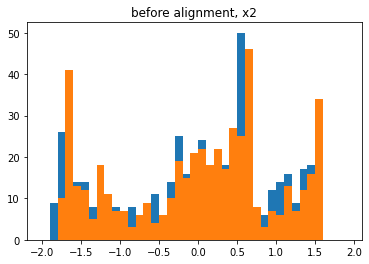

array([[ 0.,  9., 26., 15., 14., 14.,  8.,  8.,  5.,  8.,  6.,  8.,  2.,
         8., 11.,  6., 14., 25., 16., 20., 24., 18., 19., 18., 21., 50.,
         4.,  7.,  6., 12., 14., 16.,  9., 17., 18., 24.,  0.,  0.,  0.],
       [ 0.,  0., 10., 41., 13., 12.,  5., 18., 11.,  7.,  7.,  3.,  6.,
         9.,  4.,  6., 10., 19., 15., 21., 22., 18., 22., 17., 27., 25.,
        46.,  8.,  3.,  7.,  6., 13.,  7., 12., 16., 34.,  0.,  0.,  0.]])

In [86]:
np.sum(np.min(t,axis=0)) / np.sum(hist1[0])

0.778

before alignment, overlapRatio=0.778


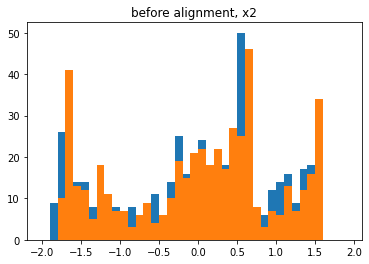

In [87]:
def overlapRatio(x1,x2):
    x1 = normalize(x1)
    x2 = normalize(x2)
    plt.figure()
    hist1=plt.hist(x1[:,0],bins=np.arange(-2,2,0.1))
    plt.title("before alignment, x1")
    # plt.figure()
    hist2=plt.hist(x2[:,0],bins=np.arange(-2,2,0.1))
    plt.title("before alignment, x2")

    t = np.concatenate([np.expand_dims(hist1[0], axis=0) , np.expand_dims(hist2[0], axis=0)],axis=0)
    _overlapRatio = np.sum(np.min(t,axis=0)) / np.sum(hist1[0])
    return _overlapRatio

_overlapRatio = overlapRatio(x1,x2)

print(f"before alignment, overlapRatio={_overlapRatio}")


/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_2540/614369558.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


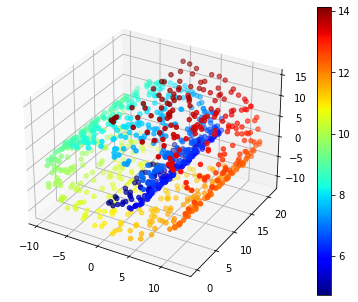

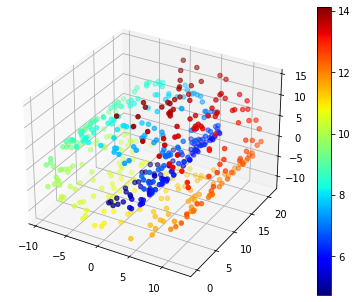

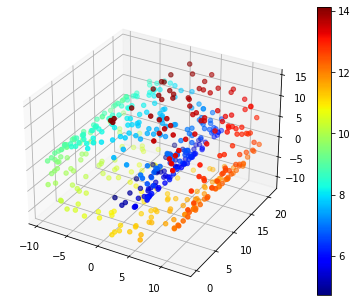

before alignment, overlapRatio=0.744


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=2, overlapRatio=0.2415966386554622


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=4, overlapRatio=0.7055214723926381


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=8, overlapRatio=0.25052192066805845


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=16, overlapRatio=0.08906882591093117


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=64, overlapRatio=0.4537987679671458


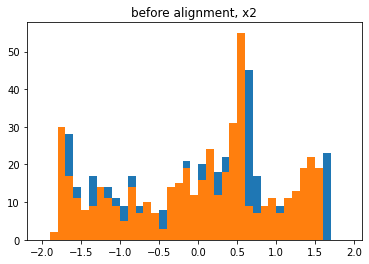

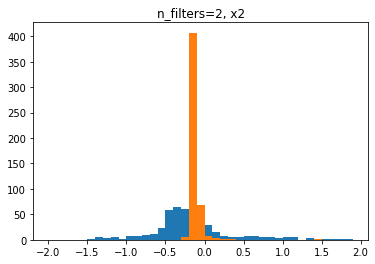

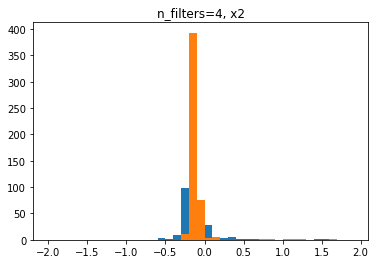

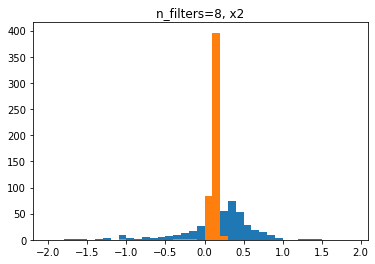

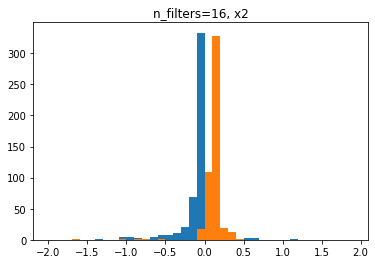

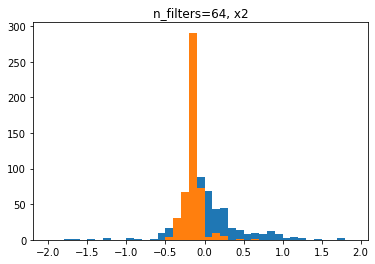

In [90]:
import harmonicalignment
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore

data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)

def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()

def normalize(X): # 默认是对每一列单独标准化 mean=0 std=1
    _X=X.copy()
    _X = zscore(_X, axis=0)
    _X[np.isnan(_X)]=0
    return _X

data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)    
scatter3d(data[0][:,0],data[0][:,1],data[0][:,2],data[1])


# 分割数据成为x1 和 x2
x1=data[0][:500,:]
label1=data[1][:500]
x2=data[0][500:,:]
label2=data[1][500:]
x=data[0]
label=data[1]

# 分别作图验证
scatter3d(x1[:,0],x1[:,1],x1[:,2],label1)
scatter3d(x2[:,0],x2[:,1],x2[:,2],label2)

# 在align之前画出某一个feature的distribution，然后计算x1和x2 overlap的比例
def overlapRatio(x1,x2,title='before alignment'):
    x1 = normalize(x1)
    x2 = normalize(x2)
    plt.figure()
    hist1=plt.hist(x1[:,0],bins=np.arange(-2,2,0.1))
    plt.title(f"{title}, x1")
    # plt.figure()
    hist2=plt.hist(x2[:,0],bins=np.arange(-2,2,0.1))
    plt.title(f"{title}, x2")

    t = np.concatenate([np.expand_dims(hist1[0], axis=0) , np.expand_dims(hist2[0], axis=0)],axis=0)
    _overlapRatio = np.sum(np.min(t,axis=0)) / np.sum(hist1[0])
    return _overlapRatio

_overlapRatio = overlapRatio(x1,x2,title='before alignment')

print(f"before alignment, overlapRatio={_overlapRatio}")

# 标准化
x1=normalize(x1)
x2=normalize(x2)

# 运行协调对齐
# scale of wavelets(eg n_filters) to use 要使用的小波规模（例如n_filters）。
wavelet_scales = [2, 4, 8, 16, 64]

for n_filters in wavelet_scales:
    ha_op = harmonicalignment.HarmonicAlignment(n_filters=n_filters)
    ha_op.align(x1, x2)
    XY_aligned = ha_op.diffusion_map()

    xb1_aligned=XY_aligned[:500]
    xb2_aligned=XY_aligned[500:]

    # # 分别作图
    # plt.figure()
    # plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
    # plt.title(f'x1 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
    # plt.title(f'x2 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
    # plt.title(f'x1x2 aligned ; n_filters={n_filters}')
    # # 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
    # # 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合

    _overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
    print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_2540/3250254023.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


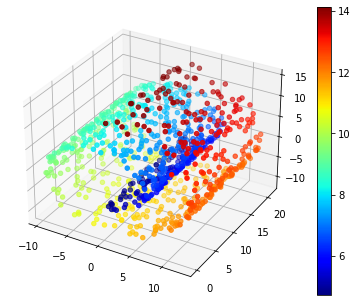

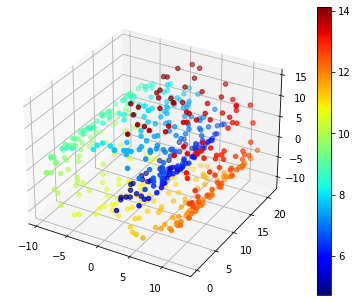

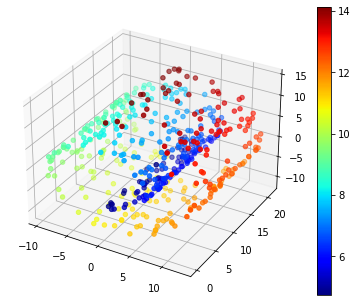

before alignment, overlapRatio=0.838


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=64, overlapRatio=0.375


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=128, overlapRatio=0.558282208588957


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=256, overlapRatio=0.14609053497942387


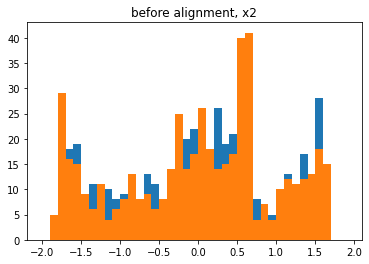

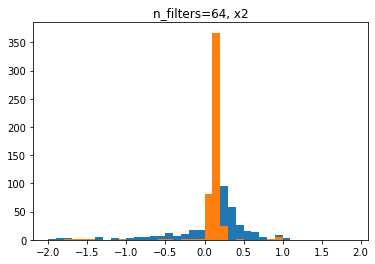

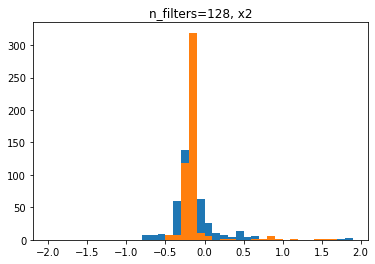

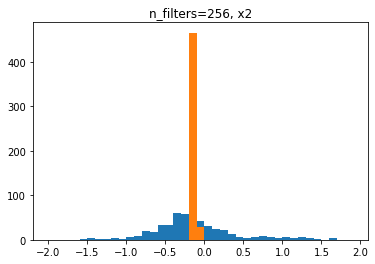

In [91]:
import harmonicalignment
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore

data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)

def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()

def normalize(X): # 默认是对每一列单独标准化 mean=0 std=1
    _X=X.copy()
    _X = zscore(_X, axis=0)
    _X[np.isnan(_X)]=0
    return _X

data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)    
scatter3d(data[0][:,0],data[0][:,1],data[0][:,2],data[1])


# 分割数据成为x1 和 x2
x1=data[0][:500,:]
label1=data[1][:500]
x2=data[0][500:,:]
label2=data[1][500:]
x=data[0]
label=data[1]

# 分别作图验证
scatter3d(x1[:,0],x1[:,1],x1[:,2],label1)
scatter3d(x2[:,0],x2[:,1],x2[:,2],label2)

# 在align之前画出某一个feature的distribution，然后计算x1和x2 overlap的比例
def overlapRatio(x1,x2,title='before alignment'):
    x1 = normalize(x1)
    x2 = normalize(x2)
    plt.figure()
    hist1=plt.hist(x1[:,0],bins=np.arange(-2,2,0.1))
    plt.title(f"{title}, x1")
    # plt.figure()
    hist2=plt.hist(x2[:,0],bins=np.arange(-2,2,0.1))
    plt.title(f"{title}, x2")

    t = np.concatenate([np.expand_dims(hist1[0], axis=0) , np.expand_dims(hist2[0], axis=0)],axis=0)
    _overlapRatio = np.sum(np.min(t,axis=0)) / np.sum(hist1[0])
    return _overlapRatio

_overlapRatio = overlapRatio(x1,x2,title='before alignment')

print(f"before alignment, overlapRatio={_overlapRatio}")

# 标准化
x1=normalize(x1)
x2=normalize(x2)

# 运行协调对齐
# scale of wavelets(eg n_filters) to use 要使用的小波规模（例如n_filters）。
wavelet_scales = [2, 4, 8, 16, 64]
wavelet_scales = [64, 128, 256]

for n_filters in wavelet_scales:
    ha_op = harmonicalignment.HarmonicAlignment(n_filters=n_filters)
    ha_op.align(x1, x2)
    XY_aligned = ha_op.diffusion_map()

    xb1_aligned=XY_aligned[:500]
    xb2_aligned=XY_aligned[500:]

    # # 分别作图
    # plt.figure()
    # plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
    # plt.title(f'x1 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
    # plt.title(f'x2 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
    # plt.title(f'x1x2 aligned ; n_filters={n_filters}')
    # # 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
    # # 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合

    _overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
    print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_2540/2570920544.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


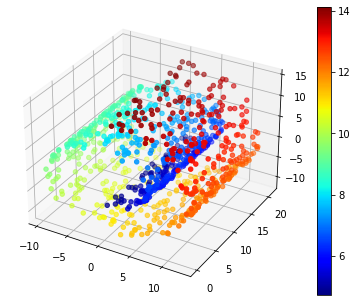

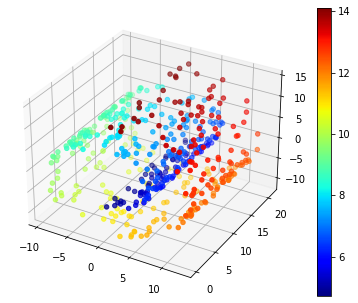

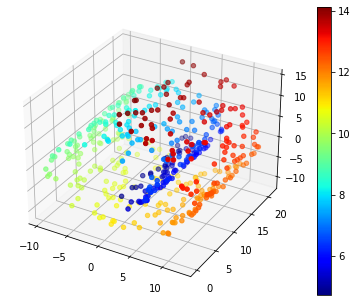

before alignment, overlapRatio=0.862


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=64, overlapRatio=0.1700404858299595


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=72, overlapRatio=0.3522267206477733


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=80, overlapRatio=0.38866396761133604


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=88, overlapRatio=0.20242914979757085


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=96, overlapRatio=0.17813765182186234


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=104, overlapRatio=0.1720647773279352


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=112, overlapRatio=0.13157894736842105


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=120, overlapRatio=0.145748987854251


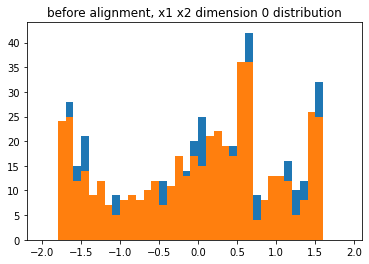

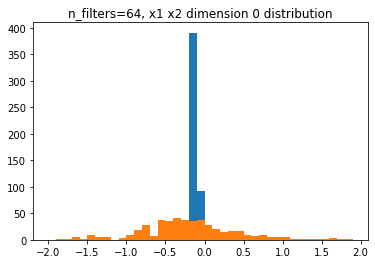

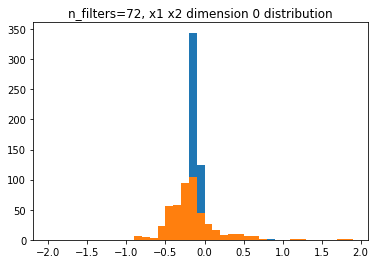

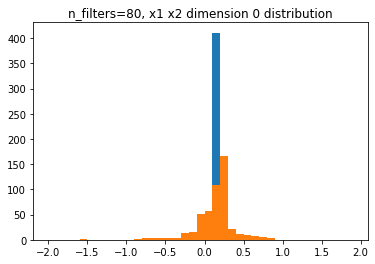

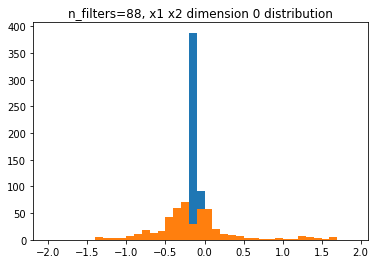

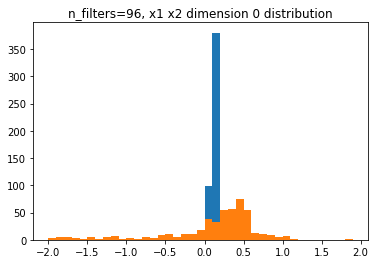

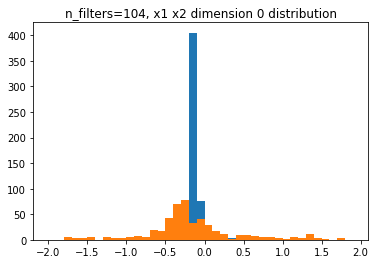

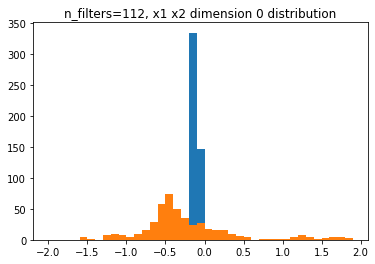

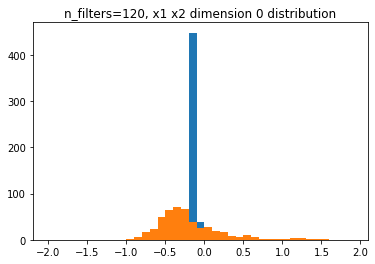

In [92]:
import harmonicalignment
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore

data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)

def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()

def normalize(X): # 默认是对每一列单独标准化 mean=0 std=1
    _X=X.copy()
    _X = zscore(_X, axis=0)
    _X[np.isnan(_X)]=0
    return _X

data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)    
scatter3d(data[0][:,0],data[0][:,1],data[0][:,2],data[1])


# 分割数据成为x1 和 x2
x1=data[0][:500,:]
label1=data[1][:500]
x2=data[0][500:,:]
label2=data[1][500:]
x=data[0]
label=data[1]

# 分别作图验证
scatter3d(x1[:,0],x1[:,1],x1[:,2],label1)
scatter3d(x2[:,0],x2[:,1],x2[:,2],label2)

# 在align之前画出某一个feature的distribution，然后计算x1和x2 overlap的比例
def overlapRatio(x1,x2,title='before alignment'):
    x1 = normalize(x1)
    x2 = normalize(x2)
    plt.figure()
    hist1=plt.hist(x1[:,0],bins=np.arange(-2,2,0.1))
    # plt.figure()
    hist2=plt.hist(x2[:,0],bins=np.arange(-2,2,0.1))
    plt.title(f"{title}, x1 x2 dimension 0 distribution")

    t = np.concatenate([np.expand_dims(hist1[0], axis=0) , np.expand_dims(hist2[0], axis=0)],axis=0)
    _overlapRatio = np.sum(np.min(t,axis=0)) / np.sum(hist1[0])
    return _overlapRatio

_overlapRatio = overlapRatio(x1,x2,title='before alignment')

print(f"before alignment, overlapRatio={_overlapRatio}")

# 标准化
x1=normalize(x1)
x2=normalize(x2)

# 运行协调对齐
# scale of wavelets(eg n_filters) to use 要使用的小波规模（例如n_filters）。
wavelet_scales = [2, 4, 8, 16, 64]
wavelet_scales = [64, 128, 256]
wavelet_scales = np.arange(64,128,8)

for n_filters in wavelet_scales:
    ha_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
    ha_op.align(x1, x2)
    XY_aligned = ha_op.diffusion_map()

    xb1_aligned=XY_aligned[:500]
    xb2_aligned=XY_aligned[500:]

    # # 分别作图
    # plt.figure()
    # plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
    # plt.title(f'x1 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
    # plt.title(f'x2 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
    # plt.title(f'x1x2 aligned ; n_filters={n_filters}')
    # # 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
    # # 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合

    _overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
    print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_2540/1002794378.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


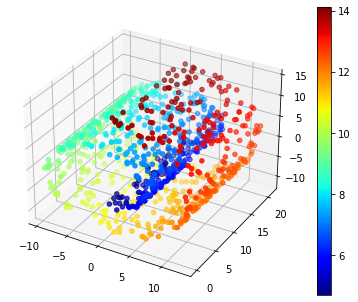

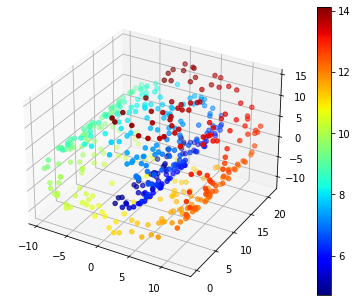

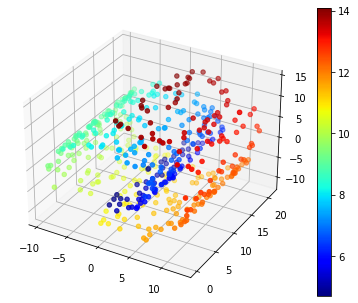

before alignment, overlapRatio=0.6515151515151515


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=64, overlapRatio=0.936


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=72, overlapRatio=0.994


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=80, overlapRatio=0.972


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=88, overlapRatio=0.932


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=96, overlapRatio=0.964


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=104, overlapRatio=0.978


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=112, overlapRatio=0.974


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=120, overlapRatio=0.962


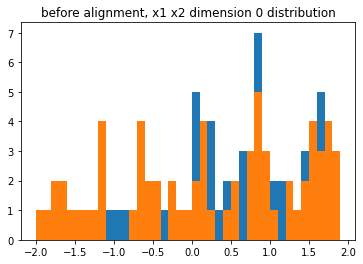

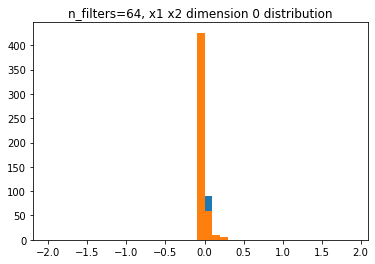

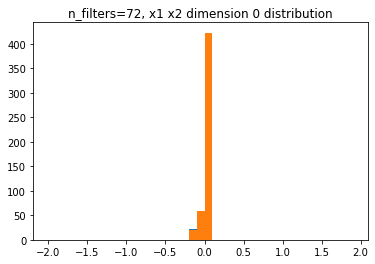

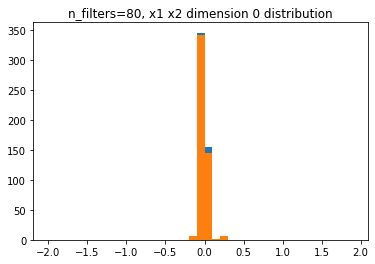

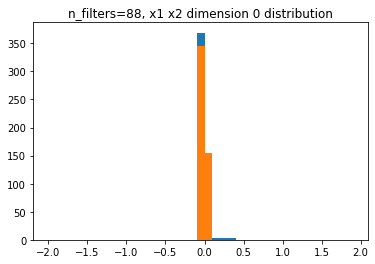

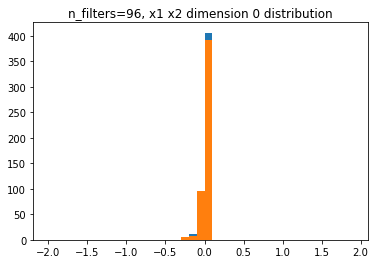

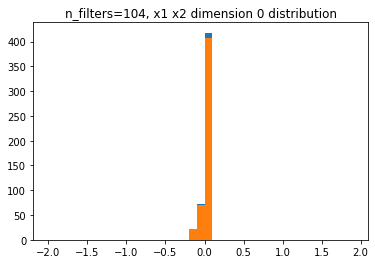

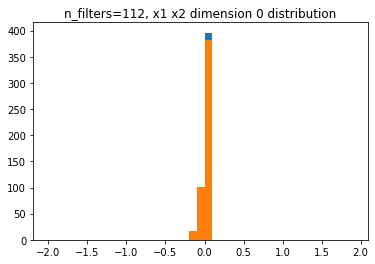

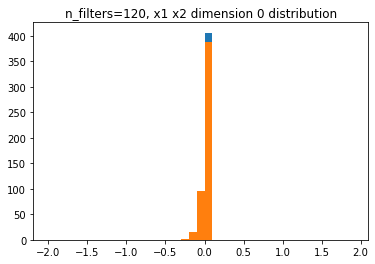

In [93]:
import harmonicalignment
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore

data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)

def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()

def normalize(X): # 默认是对每一列单独标准化 mean=0 std=1
    _X=X.copy()
    _X = zscore(_X, axis=0)
    _X[np.isnan(_X)]=0
    return _X

data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)    
scatter3d(data[0][:,0],data[0][:,1],data[0][:,2],data[1])


# 分割数据成为x1 和 x2
x1=data[0][:500,:]
label1=data[1][:500]
x2=data[0][500:,:]
label2=data[1][500:]
x=data[0]
label=data[1]

# 分别作图验证
scatter3d(x1[:,0],x1[:,1],x1[:,2],label1)
scatter3d(x2[:,0],x2[:,1],x2[:,2],label2)

# 在align之前画出某一个feature的distribution，然后计算x1和x2 overlap的比例
def overlapRatio(x1,x2,title='before alignment'):
    plt.figure()
    hist1=plt.hist(x1[:,0],bins=np.arange(-2,2,0.1))
    # plt.figure()
    hist2=plt.hist(x2[:,0],bins=np.arange(-2,2,0.1))
    plt.title(f"{title}, x1 x2 dimension 0 distribution")

    t = np.concatenate([np.expand_dims(hist1[0], axis=0) , np.expand_dims(hist2[0], axis=0)],axis=0)
    _overlapRatio = np.sum(np.min(t,axis=0)) / np.sum(hist1[0])
    return _overlapRatio

_overlapRatio = overlapRatio(x1,x2,title='before alignment')

print(f"before alignment, overlapRatio={_overlapRatio}")

# 标准化
x1=normalize(x1)
x2=normalize(x2)

# 运行协调对齐
# scale of wavelets(eg n_filters) to use 要使用的小波规模（例如n_filters）。
wavelet_scales = [2, 4, 8, 16, 64]
wavelet_scales = [64, 128, 256]
wavelet_scales = np.arange(64,128,8)

for n_filters in wavelet_scales:
    ha_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
    ha_op.align(x1, x2)
    XY_aligned = ha_op.diffusion_map()

    xb1_aligned=XY_aligned[:500]
    xb2_aligned=XY_aligned[500:]

    # # 分别作图
    # plt.figure()
    # plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
    # plt.title(f'x1 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
    # plt.title(f'x2 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
    # plt.title(f'x1x2 aligned ; n_filters={n_filters}')
    # # 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
    # # 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合

    _overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
    print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_2540/2001371966.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


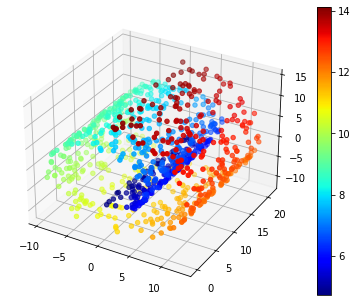

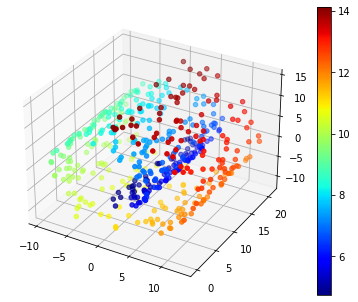

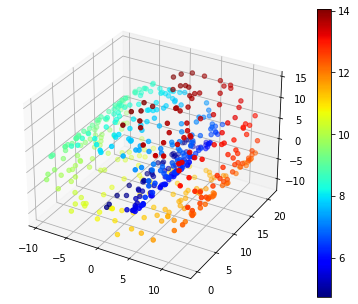

before alignment, overlapRatio=0.8242677824267782


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=64, overlapRatio=0.9658634538152611


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=72, overlapRatio=0.9615384615384616


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=80, overlapRatio=0.905811623246493


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=88, overlapRatio=0.3548387096774194


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=96, overlapRatio=0.8944099378881988


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=104, overlapRatio=0.861271676300578


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=112, overlapRatio=0.1111111111111111


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=120, overlapRatio=0.969758064516129


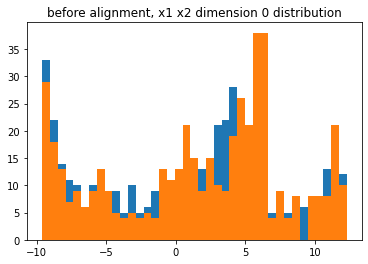

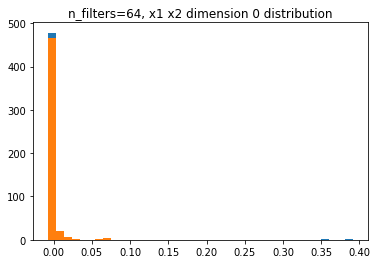

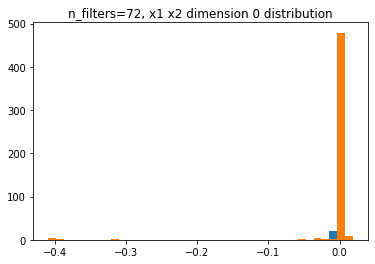

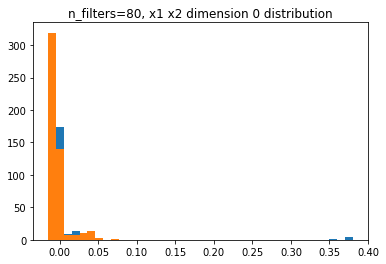

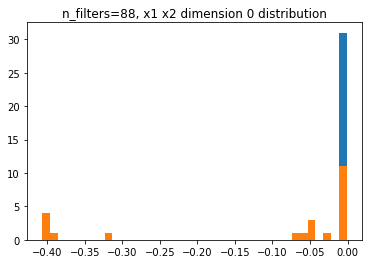

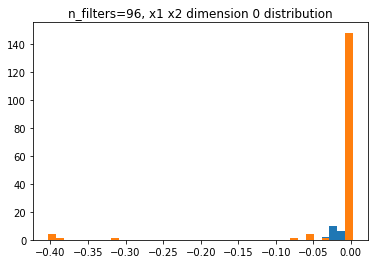

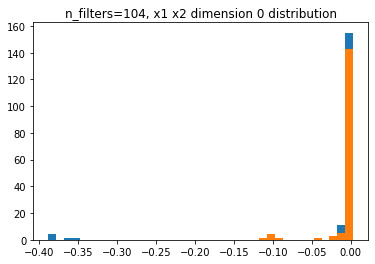

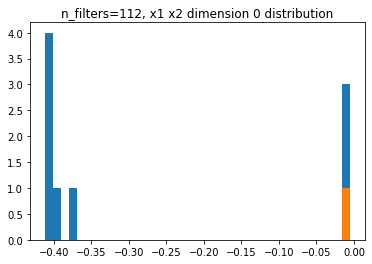

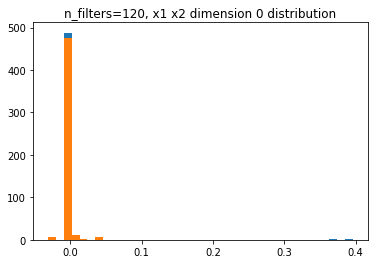

In [94]:
import harmonicalignment
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore

data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)

def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()

def normalize(X): # 默认是对每一列单独标准化 mean=0 std=1
    _X=X.copy()
    _X = zscore(_X, axis=0)
    _X[np.isnan(_X)]=0
    return _X

data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)    
scatter3d(data[0][:,0],data[0][:,1],data[0][:,2],data[1])


# 分割数据成为x1 和 x2
x1=data[0][:500,:]
label1=data[1][:500]
x2=data[0][500:,:]
label2=data[1][500:]
x=data[0]
label=data[1]

# 分别作图验证
scatter3d(x1[:,0],x1[:,1],x1[:,2],label1)
scatter3d(x2[:,0],x2[:,1],x2[:,2],label2)

# 在align之前画出某一个feature的distribution，然后计算x1和x2 overlap的比例
def overlapRatio(x1,x2,title='before alignment'):
    plt.figure()
    _max=max(max(x1[:,0]),max(x2[:,0]))
    _min=min(min(x1[:,0]),min(x2[:,0]))
    bins = np.arange(_min,_max,(_max-_min)/40)
    hist1=plt.hist(x1[:,0],bins=bins) #np.arange(-2,2,0.1)
    # plt.figure()
    hist2=plt.hist(x2[:,0],bins=bins)
    plt.title(f"{title}, x1 x2 dimension 0 distribution")

    t = np.concatenate([np.expand_dims(hist1[0], axis=0) , np.expand_dims(hist2[0], axis=0)],axis=0)
    _overlapRatio = np.sum(np.min(t,axis=0)) / np.sum(hist1[0])
    return _overlapRatio

_overlapRatio = overlapRatio(x1,x2,title='before alignment')

print(f"before alignment, overlapRatio={_overlapRatio}")

# 标准化
x1=normalize(x1)
x2=normalize(x2)

# 运行协调对齐
# scale of wavelets(eg n_filters) to use 要使用的小波规模（例如n_filters）。
wavelet_scales = [2, 4, 8, 16, 64]
wavelet_scales = [64, 128, 256]
wavelet_scales = np.arange(64,128,8)

for n_filters in wavelet_scales:
    ha_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
    ha_op.align(x1, x2)
    XY_aligned = ha_op.diffusion_map()

    xb1_aligned=XY_aligned[:500]
    xb2_aligned=XY_aligned[500:]

    # # 分别作图
    # plt.figure()
    # plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
    # plt.title(f'x1 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
    # plt.title(f'x2 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
    # plt.title(f'x1x2 aligned ; n_filters={n_filters}')
    # # 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
    # # 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合

    _overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
    print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


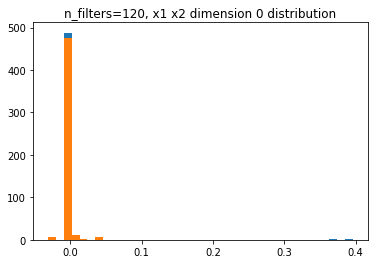

In [99]:
def overlapRatio(x1,x2):
    plt.figure()
    hist1=plt.hist(x1[:,0],bins=np.arange(-2,2,0.1))
    plt.title("before alignment, x1")
    # plt.figure()
    hist2=plt.hist(x2[:,0],bins=np.arange(-2,2,0.1))
    plt.title("before alignment, x2")

    t = np.concatenate([np.expand_dims(hist1[0], axis=0) , np.expand_dims(hist2[0], axis=0)],axis=0)
    _overlapRatio = np.sum(np.min(t,axis=0)) / np.sum(hist1[0])
    return _overlapRatio
_overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')

/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_2540/3865394998.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


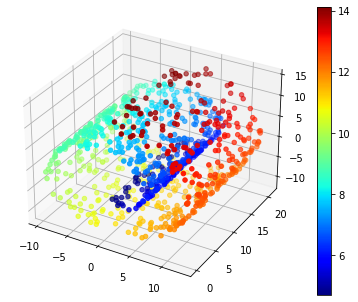

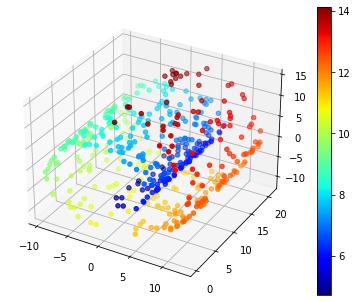

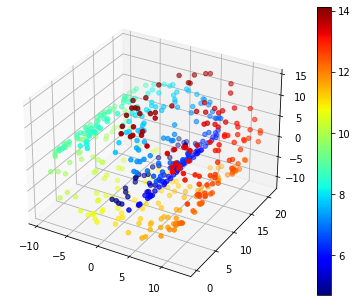

before alignment, overlapRatio=0.8413361169102297


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=2, overlapRatio=0.926


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=4, overlapRatio=0.0


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(
/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_2540/3865394998.py:58: RuntimeWarning: invalid value encountered in double_scalars
  _overlapRatio = np.sum(np.min(t,axis=0)) / np.sum(hist1[0])


n_filters=8, overlapRatio=nan


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=16, overlapRatio=0.988


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=64, overlapRatio=0.16666666666666666


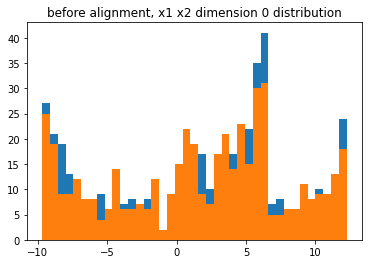

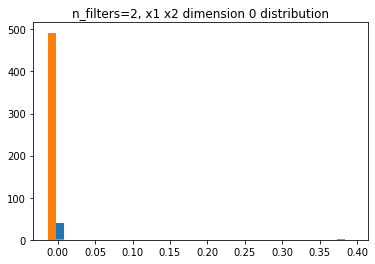

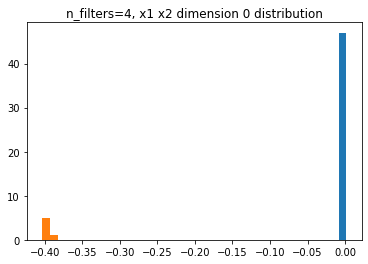

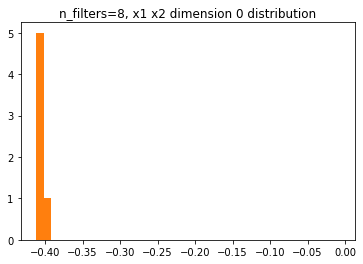

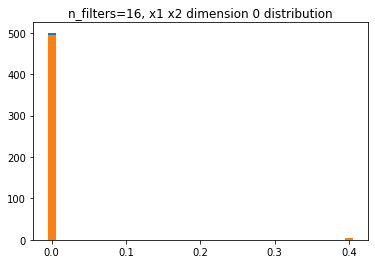

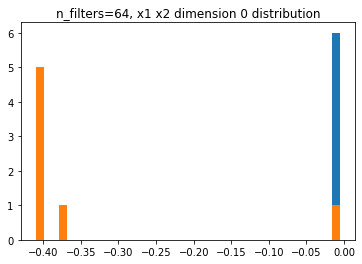

In [100]:
import harmonicalignment
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore

data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)

def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()

def normalize(X): # 默认是对每一列单独标准化 mean=0 std=1
    _X=X.copy()
    _X = zscore(_X, axis=0)
    _X[np.isnan(_X)]=0
    return _X

data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)    
scatter3d(data[0][:,0],data[0][:,1],data[0][:,2],data[1])


# 分割数据成为x1 和 x2
x1=data[0][:500,:]
label1=data[1][:500]
x2=data[0][500:,:]
label2=data[1][500:]
x=data[0]
label=data[1]

# 分别作图验证
scatter3d(x1[:,0],x1[:,1],x1[:,2],label1)
scatter3d(x2[:,0],x2[:,1],x2[:,2],label2)

# 在align之前画出某一个feature的distribution，然后计算x1和x2 overlap的比例
def overlapRatio(x1,x2,title='before alignment'):
    plt.figure()
    _max=max(max(x1[:,0]),max(x2[:,0]))
    _min=min(min(x1[:,0]),min(x2[:,0]))
    bins = np.arange(_min,_max,(_max-_min)/40)
    hist1=plt.hist(x1[:,0],bins=bins) #np.arange(-2,2,0.1)
    # plt.figure()
    hist2=plt.hist(x2[:,0],bins=bins)
    plt.title(f"{title}, x1 x2 dimension 0 distribution")

    t = np.concatenate([np.expand_dims(hist1[0], axis=0) , np.expand_dims(hist2[0], axis=0)],axis=0)
    _overlapRatio = np.sum(np.min(t,axis=0)) / np.sum(hist1[0])
    return _overlapRatio

_overlapRatio = overlapRatio(x1,x2,title='before alignment')

print(f"before alignment, overlapRatio={_overlapRatio}")

# 标准化，怀疑内置在harmonic 函数中，因此去掉归一化
# x1=normalize(x1)
# x2=normalize(x2)

# 运行协调对齐
# scale of wavelets(eg n_filters) to use 要使用的小波规模（例如n_filters）。
wavelet_scales = [2, 4, 8, 16, 64]
# wavelet_scales = [64, 128, 256]
# wavelet_scales = np.arange(64,128,8)

for n_filters in wavelet_scales:
    ha_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
    ha_op.align(x1, x2)
    XY_aligned = ha_op.diffusion_map()

    xb1_aligned=XY_aligned[:500]
    xb2_aligned=XY_aligned[500:]

    # # 分别作图
    # plt.figure()
    # plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
    # plt.title(f'x1 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
    # plt.title(f'x2 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
    # plt.title(f'x1x2 aligned ; n_filters={n_filters}')
    # # 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
    # # 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合

    _overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
    print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_2540/976954600.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


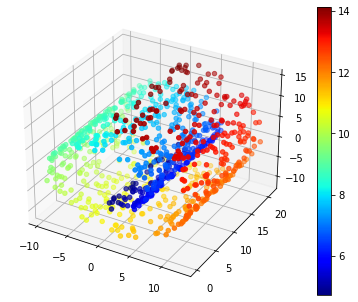

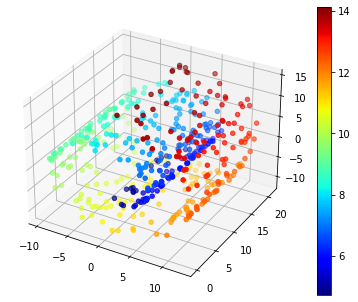

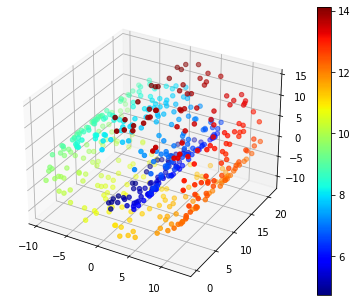

before alignment, overlapRatio=0.841995841995842


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=2, overlapRatio=0.798


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=4, overlapRatio=0.8248175182481752


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=8, overlapRatio=0.6


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=16, overlapRatio=0.886


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=64, overlapRatio=0.882


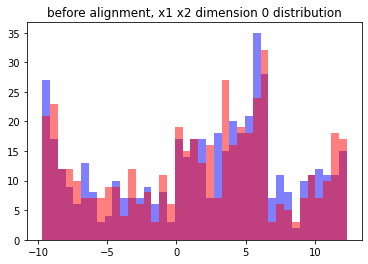

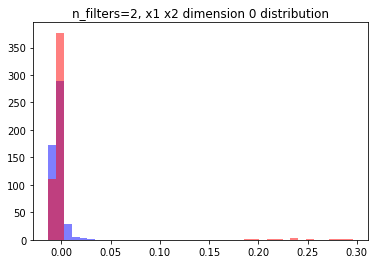

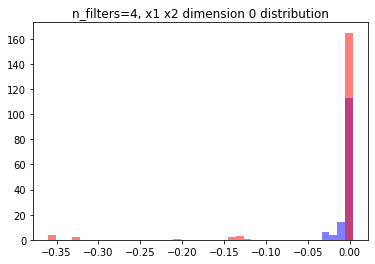

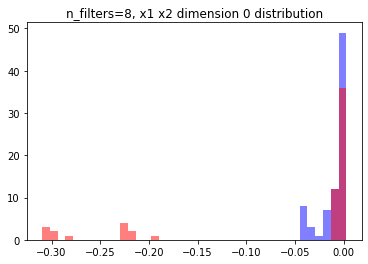

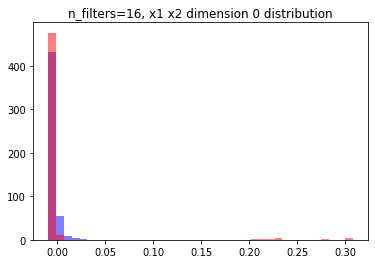

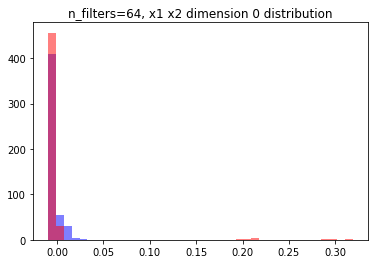

In [101]:
import harmonicalignment
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore

data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)

def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()

def normalize(X): # 默认是对每一列单独标准化 mean=0 std=1
    _X=X.copy()
    _X = zscore(_X, axis=0)
    _X[np.isnan(_X)]=0
    return _X

data=sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.1)    
scatter3d(data[0][:,0],data[0][:,1],data[0][:,2],data[1])


# 分割数据成为x1 和 x2
x1=data[0][:500,:]
label1=data[1][:500]
x2=data[0][500:,:]
label2=data[1][500:]
x=data[0]
label=data[1]

# 分别作图验证
scatter3d(x1[:,0],x1[:,1],x1[:,2],label1)
scatter3d(x2[:,0],x2[:,1],x2[:,2],label2)

# 在align之前画出某一个feature的distribution，然后计算x1和x2 overlap的比例
def overlapRatio(x1,x2,title='before alignment',nthFeature=0):
    plt.figure()
    a = x1[:,nthFeature]
    b = x2[:,nthFeature]
    _max=max(max(a),max(b))
    _min=min(min(a),min(b))
    bins = np.arange(_min,_max,(_max-_min)/40)
    hist1=plt.hist(a,bins=bins,fc=(0, 0, 1, 0.5)) #np.arange(-2,2,0.1)
    # plt.figure()
    hist2=plt.hist(b,bins=bins,fc=(1, 0, 0, 0.5))
    plt.title(f"{title}, x1 x2 dimension 0 distribution")

    t = np.concatenate([np.expand_dims(hist1[0], axis=0) , np.expand_dims(hist2[0], axis=0)],axis=0)
    _overlapRatio = np.sum(np.min(t,axis=0)) / np.sum(hist1[0])
    return _overlapRatio

_overlapRatio = overlapRatio(x1,x2,title='before alignment')

print(f"before alignment, overlapRatio={_overlapRatio}")

# 标准化，怀疑内置在harmonic 函数中，因此去掉归一化
# x1=normalize(x1)
# x2=normalize(x2)

# 运行协调对齐
# scale of wavelets(eg n_filters) to use 要使用的小波规模（例如n_filters）。
wavelet_scales = [2, 4, 8, 16, 64]
# wavelet_scales = [64, 128, 256]
# wavelet_scales = np.arange(64,128,8)

for n_filters in wavelet_scales:
    ha_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
    ha_op.align(x1, x2)
    XY_aligned = ha_op.diffusion_map()

    xb1_aligned=XY_aligned[:500]
    xb2_aligned=XY_aligned[500:]

    # # 分别作图
    # plt.figure()
    # plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
    # plt.title(f'x1 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
    # plt.title(f'x2 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
    # plt.title(f'x1x2 aligned ; n_filters={n_filters}')
    # # 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
    # # 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合

    _overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
    print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=2, overlapRatio=0.884


Text(0.5, 1.0, 'x1x2 aligned ; n_filters=2')

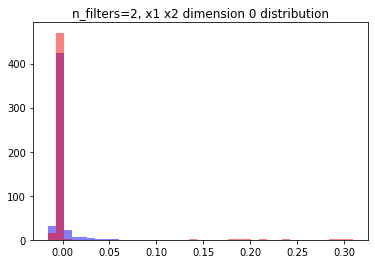

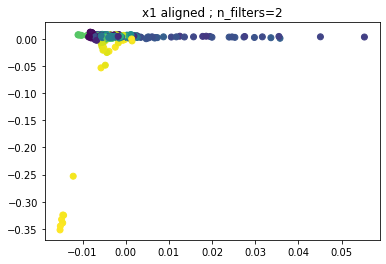

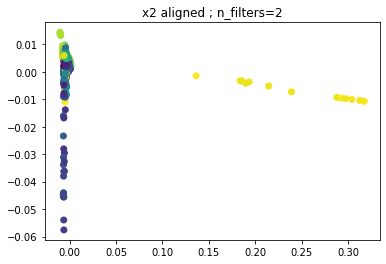

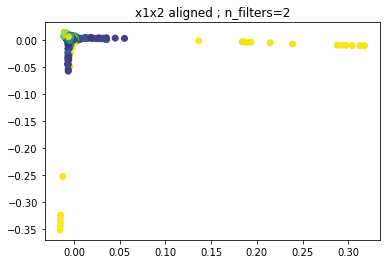

In [103]:
n_filters=2
ha_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
ha_op.align(x1, x2)
XY_aligned = ha_op.diffusion_map()

xb1_aligned=XY_aligned[:500]
xb2_aligned=XY_aligned[500:]


_overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


# 分别作图
plt.figure()
plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
plt.title(f'x1 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
plt.title(f'x2 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=4, overlapRatio=0.7768595041322314


Text(0.5, 1.0, 'x1x2 aligned ; n_filters=4')

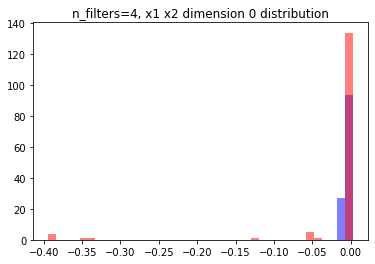

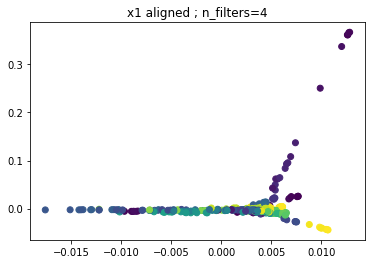

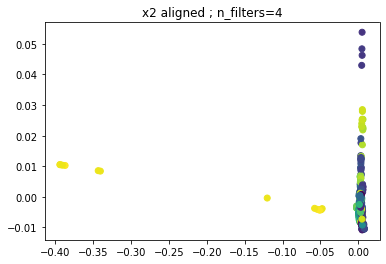

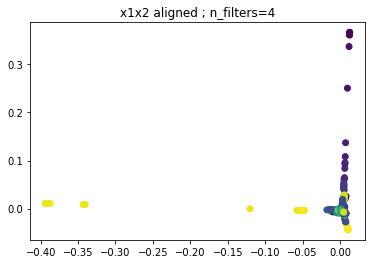

In [104]:
n_filters=4
ha_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
ha_op.align(x1, x2)
XY_aligned = ha_op.diffusion_map()

xb1_aligned=XY_aligned[:500]
xb2_aligned=XY_aligned[500:]


_overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


# 分别作图
plt.figure()
plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
plt.title(f'x1 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
plt.title(f'x2 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (1000, 998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=16, overlapRatio=0.8421052631578947


Text(0.5, 1.0, 'x1x2 aligned ; n_filters=16')

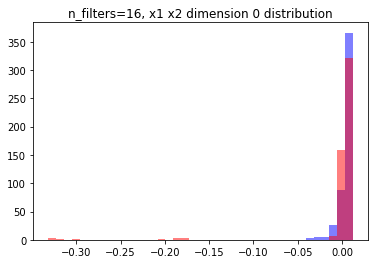

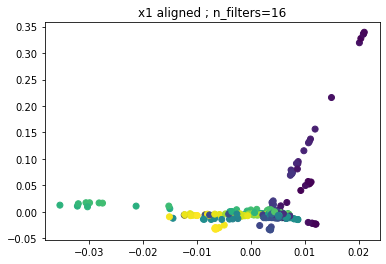

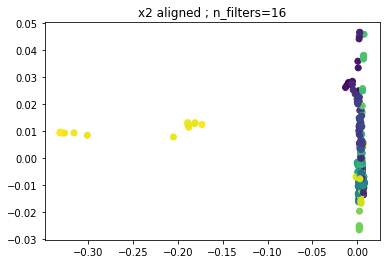

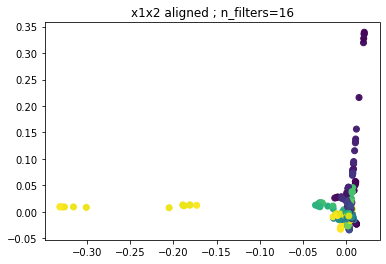

In [105]:
n_filters=16
ha_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
ha_op.align(x1, x2)
XY_aligned = ha_op.diffusion_map()

xb1_aligned=XY_aligned[:500]
xb2_aligned=XY_aligned[500:]


_overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


# 分别作图
plt.figure()
plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
plt.title(f'x1 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
plt.title(f'x2 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合


/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_2540/220998101.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


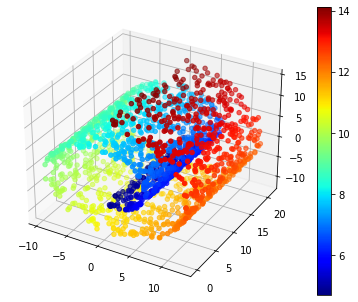

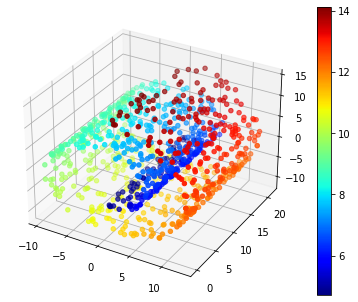

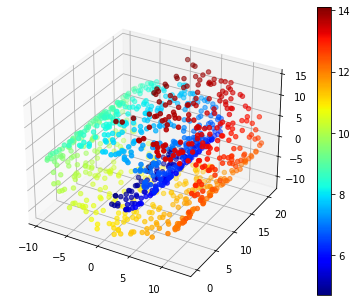

before alignment, overlapRatio=0.922422954303932


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (2000, 1998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=2, overlapRatio=0.15517241379310345


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (2000, 1998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=4, overlapRatio=0.0


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (2000, 1998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=8, overlapRatio=0.994


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (2000, 1998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=16, overlapRatio=0.994


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (2000, 1998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=64, overlapRatio=0.994


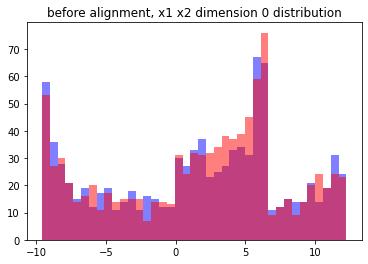

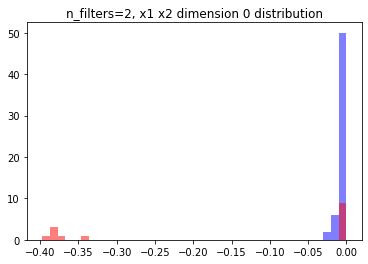

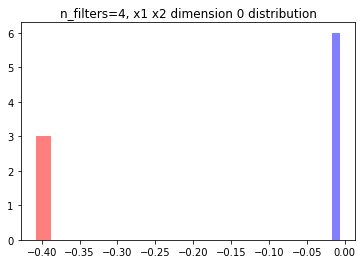

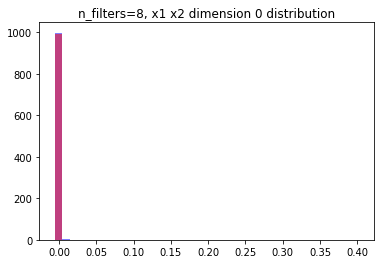

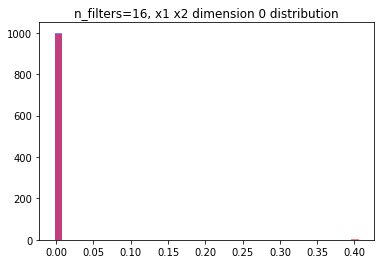

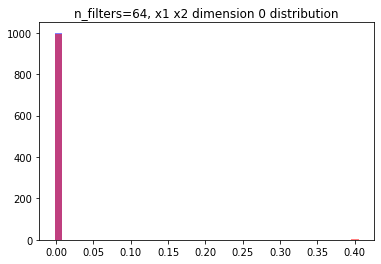

In [106]:
import harmonicalignment
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore

def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()

def normalize(X): # 默认是对每一列单独标准化 mean=0 std=1
    _X=X.copy()
    _X = zscore(_X, axis=0)
    _X[np.isnan(_X)]=0
    return _X

data=sklearn.datasets.make_swiss_roll(n_samples=2000, noise=0.1)    
scatter3d(data[0][:,0],data[0][:,1],data[0][:,2],data[1])


# 分割数据成为x1 和 x2
x1=data[0][:1000,:]
label1=data[1][:1000]
x2=data[0][1000:,:]
label2=data[1][1000:]
x=data[0]
label=data[1]

# 分别作图验证
scatter3d(x1[:,0],x1[:,1],x1[:,2],label1)
scatter3d(x2[:,0],x2[:,1],x2[:,2],label2)

# 在align之前画出某一个feature的distribution，然后计算x1和x2 overlap的比例
def overlapRatio(x1,x2,title='before alignment',nthFeature=0):
    plt.figure()
    a = x1[:,nthFeature]
    b = x2[:,nthFeature]
    _max=max(max(a),max(b))
    _min=min(min(a),min(b))
    bins = np.arange(_min,_max,(_max-_min)/40)
    hist1=plt.hist(a,bins=bins,fc=(0, 0, 1, 0.5)) #np.arange(-2,2,0.1)
    # plt.figure()
    hist2=plt.hist(b,bins=bins,fc=(1, 0, 0, 0.5))
    plt.title(f"{title}, x1 x2 dimension 0 distribution")

    t = np.concatenate([np.expand_dims(hist1[0], axis=0) , np.expand_dims(hist2[0], axis=0)],axis=0)
    _overlapRatio = np.sum(np.min(t,axis=0)) / np.sum(hist1[0])
    return _overlapRatio

_overlapRatio = overlapRatio(x1,x2,title='before alignment')

print(f"before alignment, overlapRatio={_overlapRatio}")

# 标准化，怀疑内置在harmonic 函数中，因此去掉归一化
# x1=normalize(x1)
# x2=normalize(x2)

# 运行协调对齐
# scale of wavelets(eg n_filters) to use 要使用的小波规模（例如n_filters）。
wavelet_scales = [2, 4, 8, 16, 64]
# wavelet_scales = [64, 128, 256]
# wavelet_scales = np.arange(64,128,8)

for n_filters in wavelet_scales:
    ha_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
    ha_op.align(x1, x2)
    XY_aligned = ha_op.diffusion_map()

    xb1_aligned=XY_aligned[:1000]
    xb2_aligned=XY_aligned[1000:]

    # # 分别作图
    # plt.figure()
    # plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
    # plt.title(f'x1 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
    # plt.title(f'x2 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
    # plt.title(f'x1x2 aligned ; n_filters={n_filters}')
    # # 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
    # # 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合

    _overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
    print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_2540/722161122.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


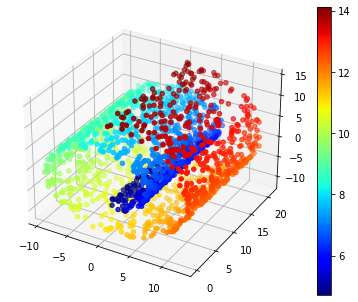

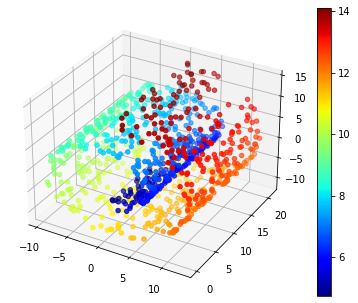

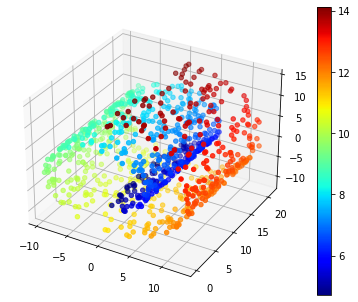

before alignment, overlapRatio=0.8904109589041096
Calculating Harmonic Alignment...
  Calculating diffusion coordinates...
Calculating KNN search...
Calculated KNN search in 0.03 seconds.
Calculating affinities...
Calculated affinities in 0.02 seconds.
    Calculating eigendecomposition...
    Calculated eigendecomposition in 0.47 seconds.
Calculating KNN search...
Calculated KNN search in 0.03 seconds.
Calculating affinities...
Calculated affinities in 0.02 seconds.
    Calculating eigendecomposition...
    Calculated eigendecomposition in 0.78 seconds.
  Calculated diffusion coordinates in 1.49 seconds.
  Calculating wavelets...
  Calculated wavelets in 2.16 seconds.
  Calculating transformed data...
    Calculating graph Laplacian...
Calculating PCA...
Calculated PCA in 0.77 seconds.
Calculating KNN search...
Calculated KNN search in 0.56 seconds.
Calculating affinities...
Calculated affinities in 0.08 seconds.
    Calculated graph Laplacian in 1.52 seconds.
  Calculated transformed

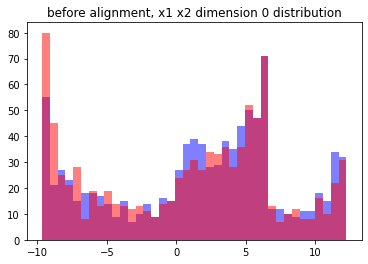

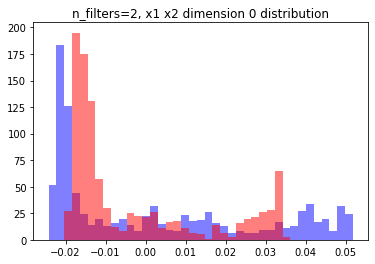

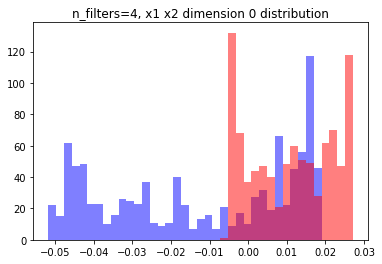

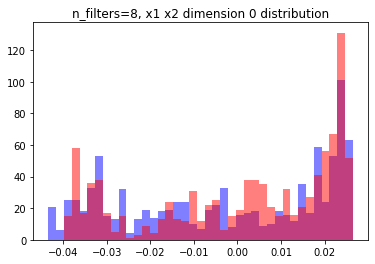

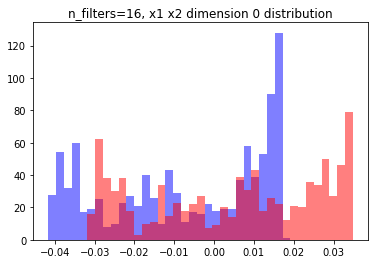

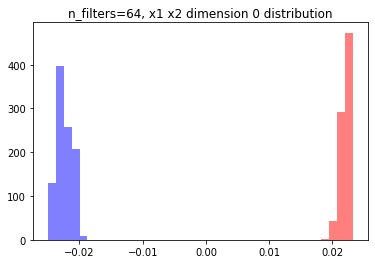

In [109]:
import harmonicalignment
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore

def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()

def normalize(X): # 默认是对每一列单独标准化 mean=0 std=1
    _X=X.copy()
    _X = zscore(_X, axis=0)
    _X[np.isnan(_X)]=0
    return _X

data=sklearn.datasets.make_swiss_roll(n_samples=2000, noise=0.1)    
scatter3d(data[0][:,0],data[0][:,1],data[0][:,2],data[1])


# 分割数据成为x1 和 x2
x1=data[0][:1000,:]
label1=data[1][:1000]
x2=data[0][1000:,:]
label2=data[1][1000:]
x=data[0]
label=data[1]

# 分别作图验证
scatter3d(x1[:,0],x1[:,1],x1[:,2],label1)
scatter3d(x2[:,0],x2[:,1],x2[:,2],label2)

# 在align之前画出某一个feature的distribution，然后计算x1和x2 overlap的比例
def overlapRatio(x1,x2,title='before alignment',nthFeature=0):
    plt.figure()
    a = x1[:,nthFeature]
    b = x2[:,nthFeature]
    _max=max(max(a),max(b))
    _min=min(min(a),min(b))
    bins = np.arange(_min,_max,(_max-_min)/40)
    hist1=plt.hist(a,bins=bins,fc=(0, 0, 1, 0.5)) #np.arange(-2,2,0.1)
    # plt.figure()
    hist2=plt.hist(b,bins=bins,fc=(1, 0, 0, 0.5))
    plt.title(f"{title}, x1 x2 dimension 0 distribution")

    t = np.concatenate([np.expand_dims(hist1[0], axis=0) , np.expand_dims(hist2[0], axis=0)],axis=0)
    _overlapRatio = np.sum(np.min(t,axis=0)) / np.sum(hist1[0])
    return _overlapRatio

_overlapRatio = overlapRatio(x1,x2,title='before alignment')

print(f"before alignment, overlapRatio={_overlapRatio}")

# 标准化，怀疑内置在harmonic 函数中，因此去掉归一化
# x1=normalize(x1)
# x2=normalize(x2)

# 运行协调对齐
# scale of wavelets(eg n_filters) to use 要使用的小波规模（例如n_filters）。
wavelet_scales = [2, 4, 8, 16, 64]
# wavelet_scales = [64, 128, 256]
# wavelet_scales = np.arange(64,128,8)

for n_filters in wavelet_scales:
    # align_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
    align_op = harmonicalignment.HarmonicAlignment(
                int(n_filters),
                t=1, # 1
                overlap=2,
                verbose=1,
                knn_X=20, # 20
                knn_Y=20, # 20
                knn_XY=10, # 10
                decay_X=20, # 20
                decay_Y=20, # 20
                decay_XY=10, # 10
                n_pca_X=100, # 100
                n_pca_Y=100, # 100
                n_pca_XY=None, # None
            )
    align_op.align(x1, x2)
    XY_aligned = align_op.diffusion_map()

    xb1_aligned=XY_aligned[:1000]
    xb2_aligned=XY_aligned[1000:]

    # # 分别作图
    # plt.figure()
    # plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
    # plt.title(f'x1 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
    # plt.title(f'x2 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
    # plt.title(f'x1x2 aligned ; n_filters={n_filters}')
    # # 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
    # # 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合

    _overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
    print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


/usr/local/lib/python3.9/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (2000, 1998) is expensive. Consider setting n_pca.
  warnings.warn(


n_filters=8, overlapRatio=0.9899699097291875


Text(0.5, 1.0, 'x1x2 aligned ; n_filters=8')

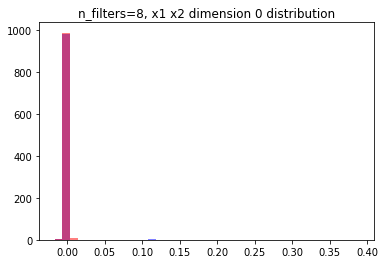

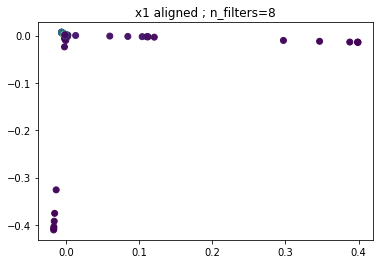

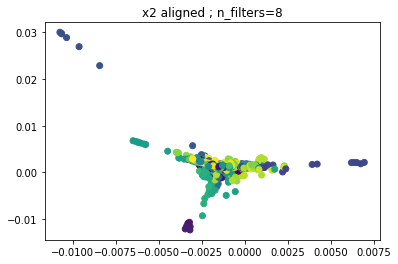

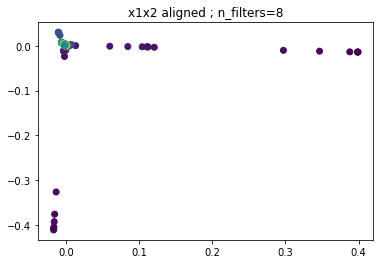

In [111]:
# for n_filters in wavelet_scales:
n_filters=8
# align_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
align_op = harmonicalignment.HarmonicAlignment(
            int(n_filters),
#             t=1, # 1
#             overlap=2,
#             verbose=1,
#             knn_X=20, # 20
#             knn_Y=20, # 20
#             knn_XY=10, # 10
#             decay_X=20, # 20
#             decay_Y=20, # 20
#             decay_XY=10, # 10
#             n_pca_X=100, # 100
#             n_pca_Y=100, # 100
#             n_pca_XY=None, # None
        )
align_op.align(x1, x2)
XY_aligned = align_op.diffusion_map()

xb1_aligned=XY_aligned[:1000]
xb2_aligned=XY_aligned[1000:]



_overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")

# 分别作图
plt.figure()
plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
plt.title(f'x1 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
plt.title(f'x2 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合

Calculating Harmonic Alignment...
  Calculating diffusion coordinates...
Calculating KNN search...
Calculated KNN search in 0.03 seconds.
Calculating affinities...
Calculated affinities in 0.03 seconds.
    Calculating eigendecomposition...
    Calculated eigendecomposition in 0.35 seconds.
Calculating KNN search...
Calculated KNN search in 0.03 seconds.
Calculating affinities...
Calculated affinities in 0.02 seconds.
    Calculating eigendecomposition...
    Calculated eigendecomposition in 0.41 seconds.
  Calculated diffusion coordinates in 1.02 seconds.
  Calculating wavelets...
  Calculated wavelets in 2.01 seconds.
  Calculating transformed data...
    Calculating graph Laplacian...
Calculating PCA...
Calculated PCA in 0.66 seconds.
Calculating KNN search...
Calculated KNN search in 0.48 seconds.
Calculating affinities...
Calculated affinities in 0.04 seconds.
    Calculated graph Laplacian in 1.27 seconds.
  Calculated transformed data in 1.72 seconds.
Calculated Harmonic Alignme

Text(0.5, 1.0, 'x1x2 aligned ; n_filters=8')

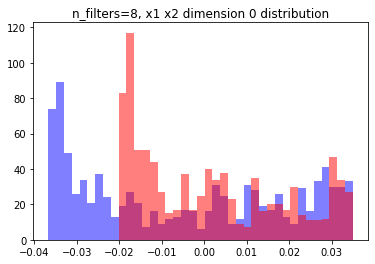

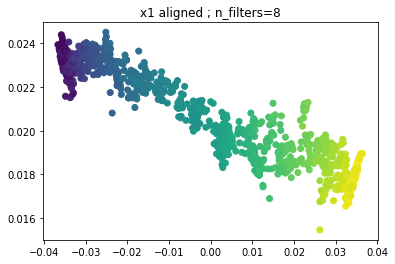

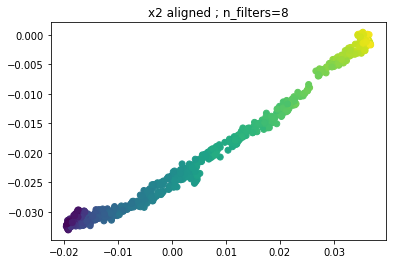

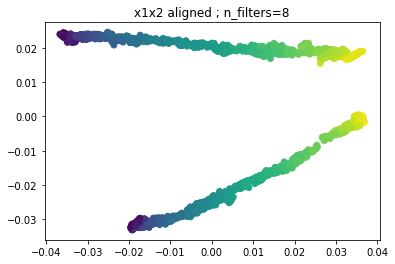

In [112]:
# for n_filters in wavelet_scales:
n_filters=8
# align_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
align_op = harmonicalignment.HarmonicAlignment(
            int(n_filters),
            t=1, # 1
            overlap=2,
            verbose=1,
            knn_X=20, # 20
            knn_Y=20, # 20
            knn_XY=10, # 10
            decay_X=20, # 20
            decay_Y=20, # 20
            decay_XY=10, # 10
            n_pca_X=100, # 100
            n_pca_Y=100, # 100
            n_pca_XY=None, # None
        )
align_op.align(x1, x2)
XY_aligned = align_op.diffusion_map()

xb1_aligned=XY_aligned[:1000]
xb2_aligned=XY_aligned[1000:]



_overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")

# 分别作图
plt.figure()
plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
plt.title(f'x1 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
plt.title(f'x2 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合

/Users/kailong/Desktop/rtEnv/harmonic/harmonic-alignment/python/harmonicalignment/harmonicalignment.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  scale = lambda_max * overlap / (n_filters - overlap + 1)


n_filters=2, overlapRatio=0.665650406504065


Text(0.5, 1.0, 'x1x2 aligned ; n_filters=2')

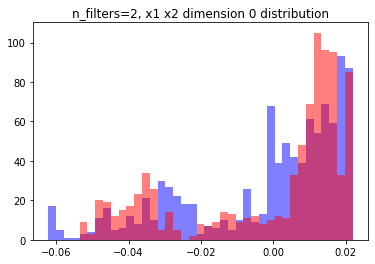

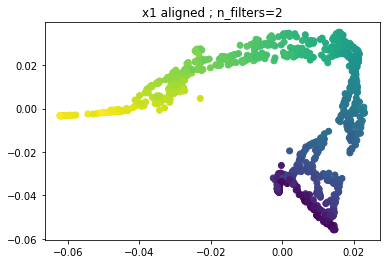

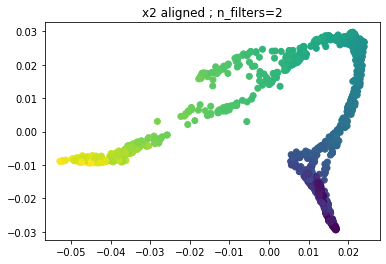

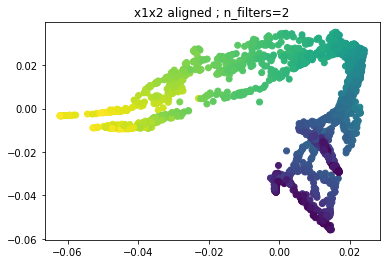

In [126]:
# for n_filters in wavelet_scales:
n_filters=2
# align_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
align_op = harmonicalignment.HarmonicAlignment(
            int(n_filters),
            t=1, # 1
            overlap=3,
            verbose=0,
            knn_X=20, # 20
            knn_Y=20, # 20
            knn_XY=10, # 10
    
            decay_X=20, # 20
            decay_Y=20, # 20
            decay_XY=10, # 10
    
            n_pca_X=100, # 100
            n_pca_Y=100, # 100
            n_pca_XY=None, # None
        )
align_op.align(x1, x2)
XY_aligned = align_op.diffusion_map()

xb1_aligned=XY_aligned[:1000]
xb2_aligned=XY_aligned[1000:]



_overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")

# 分别作图
plt.figure()
plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
plt.title(f'x1 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
plt.title(f'x2 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合

n_filters=2, overlapRatio=0.808316430020284


Text(0.5, 1.0, 'x1x2 aligned ; n_filters=2')

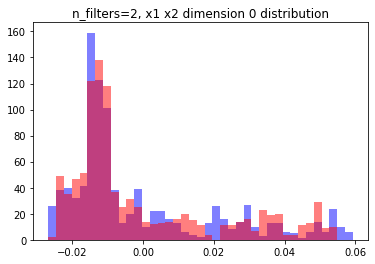

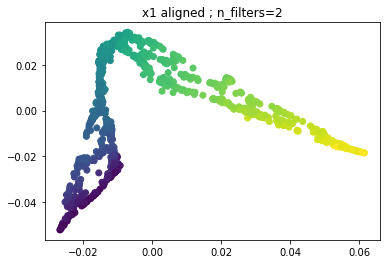

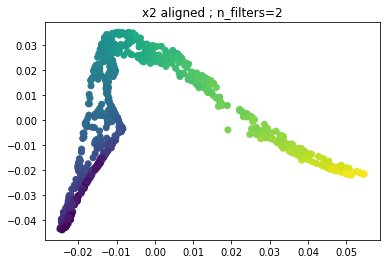

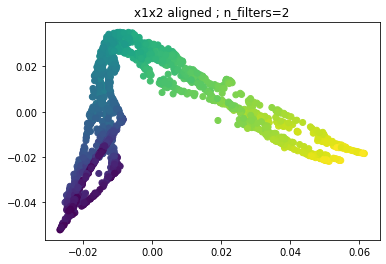

In [127]:
# for n_filters in wavelet_scales:
n_filters=2
# align_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
align_op = harmonicalignment.HarmonicAlignment(
            int(n_filters),
            t=1, # 1
            overlap=4,
            verbose=0,
            knn_X=20, # 20
            knn_Y=20, # 20
            knn_XY=10, # 10
    
            decay_X=20, # 20
            decay_Y=20, # 20
            decay_XY=10, # 10
    
            n_pca_X=100, # 100
            n_pca_Y=100, # 100
            n_pca_XY=None, # None
        )
align_op.align(x1, x2)
XY_aligned = align_op.diffusion_map()

xb1_aligned=XY_aligned[:1000]
xb2_aligned=XY_aligned[1000:]



_overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")

# 分别作图
plt.figure()
plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
plt.title(f'x1 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
plt.title(f'x2 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合

/var/folders/4v/rml1wwps07b7b2qgflm7z0h00000gn/T/ipykernel_2540/1189394446.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


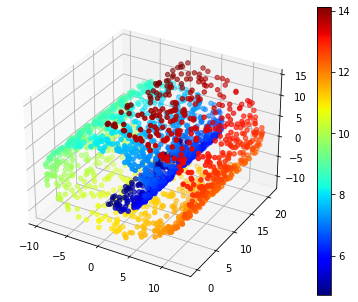

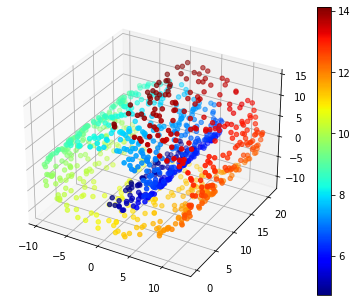

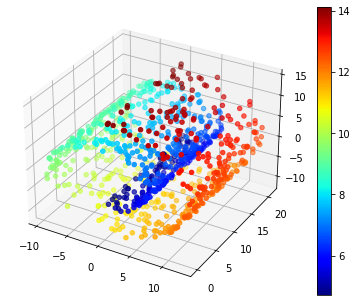

before alignment, overlapRatio=0.8827292110874201
n_filters=2, overlapRatio=0.8114169215086646
n_filters=4, overlapRatio=0.6836628511966701
n_filters=8, overlapRatio=0.641
n_filters=16, overlapRatio=0.638
n_filters=64, overlapRatio=0.0


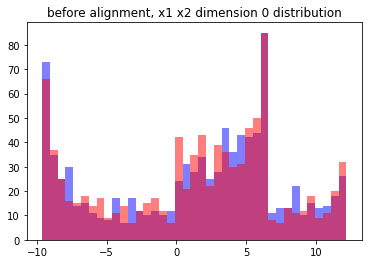

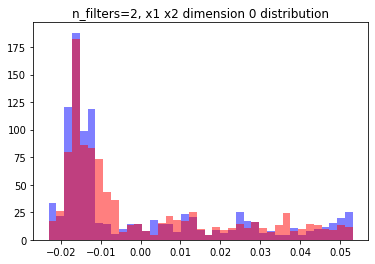

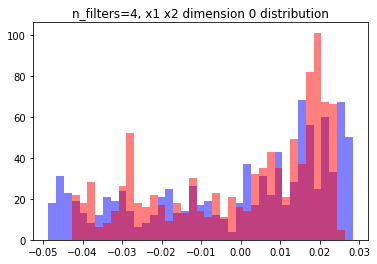

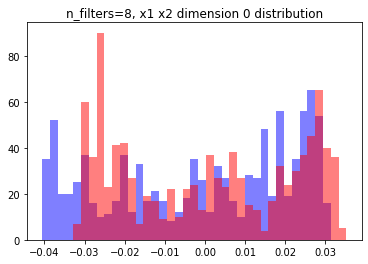

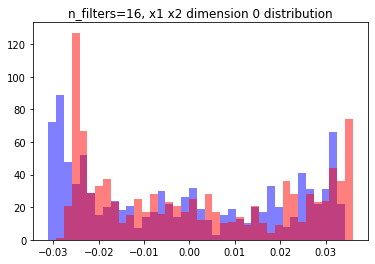

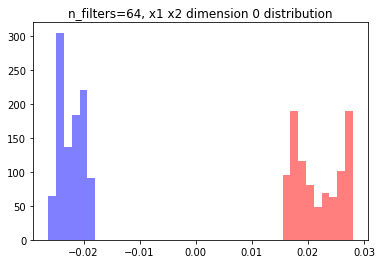

In [128]:
import harmonicalignment
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore

def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()

def normalize(X): # 默认是对每一列单独标准化 mean=0 std=1
    _X=X.copy()
    _X = zscore(_X, axis=0)
    _X[np.isnan(_X)]=0
    return _X

data=sklearn.datasets.make_swiss_roll(n_samples=2000, noise=0.1)    
scatter3d(data[0][:,0],data[0][:,1],data[0][:,2],data[1])


# 分割数据成为x1 和 x2
x1=data[0][:1000,:]
label1=data[1][:1000]
x2=data[0][1000:,:]
label2=data[1][1000:]
x=data[0]
label=data[1]

# 分别作图验证
scatter3d(x1[:,0],x1[:,1],x1[:,2],label1)
scatter3d(x2[:,0],x2[:,1],x2[:,2],label2)

# 在align之前画出某一个feature的distribution，然后计算x1和x2 overlap的比例
def overlapRatio(x1,x2,title='before alignment',nthFeature=0):
    plt.figure()
    a = x1[:,nthFeature]
    b = x2[:,nthFeature]
    _max=max(max(a),max(b))
    _min=min(min(a),min(b))
    bins = np.arange(_min,_max,(_max-_min)/40)
    hist1=plt.hist(a,bins=bins,fc=(0, 0, 1, 0.5)) #np.arange(-2,2,0.1)
    # plt.figure()
    hist2=plt.hist(b,bins=bins,fc=(1, 0, 0, 0.5))
    plt.title(f"{title}, x1 x2 dimension 0 distribution")

    t = np.concatenate([np.expand_dims(hist1[0], axis=0) , np.expand_dims(hist2[0], axis=0)],axis=0)
    _overlapRatio = np.sum(np.min(t,axis=0)) / np.sum(hist1[0])
    return _overlapRatio

_overlapRatio = overlapRatio(x1,x2,title='before alignment')

print(f"before alignment, overlapRatio={_overlapRatio}")

# 标准化，怀疑内置在harmonic 函数中，因此去掉归一化
# x1=normalize(x1)
# x2=normalize(x2)

# 运行协调对齐
# scale of wavelets(eg n_filters) to use 要使用的小波规模（例如n_filters）。
wavelet_scales = [2, 4, 8, 16, 64]
# wavelet_scales = [64, 128, 256]
# wavelet_scales = np.arange(64,128,8)

for n_filters in wavelet_scales:
    # align_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
    align_op = harmonicalignment.HarmonicAlignment(
                int(n_filters),
                t=1, # 1
                overlap=4,
                verbose=0,
                knn_X=20, # 20
                knn_Y=20, # 20
                knn_XY=10, # 10
                decay_X=20, # 20
                decay_Y=20, # 20
                decay_XY=10, # 10
                n_pca_X=100, # 100
                n_pca_Y=100, # 100
                n_pca_XY=None, # None
            )
    align_op.align(x1, x2)
    XY_aligned = align_op.diffusion_map()

    xb1_aligned=XY_aligned[:1000]
    xb2_aligned=XY_aligned[1000:]

    # # 分别作图
    # plt.figure()
    # plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
    # plt.title(f'x1 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
    # plt.title(f'x2 aligned ; n_filters={n_filters}')
    # plt.figure()
    # plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
    # plt.title(f'x1x2 aligned ; n_filters={n_filters}')
    # # 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
    # # 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合

    _overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
    print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


n_filters=2, overlapRatio=0.6369168356997972


Text(0.5, 1.0, 'x1x2 aligned ; n_filters=2')

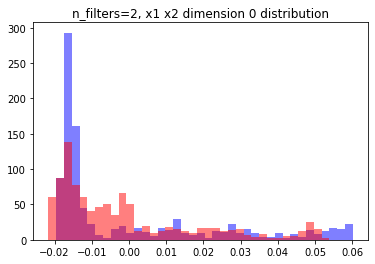

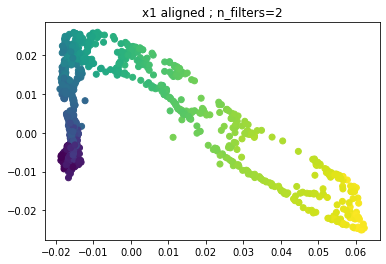

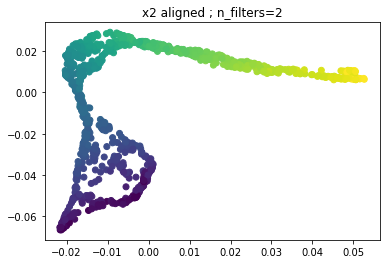

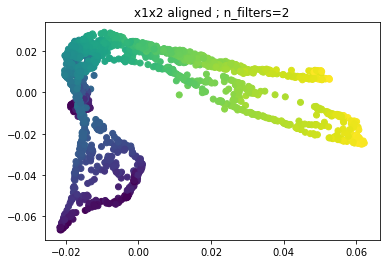

In [129]:
n_filters=2
# align_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
align_op = harmonicalignment.HarmonicAlignment(
            int(n_filters),
            t=1, # 1
            overlap=4,
            verbose=0,
            knn_X=20, # 20
            knn_Y=20, # 20
            knn_XY=10, # 10
            decay_X=20, # 20
            decay_Y=20, # 20
            decay_XY=10, # 10
            n_pca_X=100, # 100
            n_pca_Y=100, # 100
            n_pca_XY=None, # None
        )
align_op.align(x1, x2)
XY_aligned = align_op.diffusion_map()

xb1_aligned=XY_aligned[:1000]
xb2_aligned=XY_aligned[1000:]


_overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


# 分别作图
plt.figure()
plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
plt.title(f'x1 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
plt.title(f'x2 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合


n_filters=4, overlapRatio=0.6174974567650051


Text(0.5, 1.0, 'x1x2 aligned ; n_filters=4')

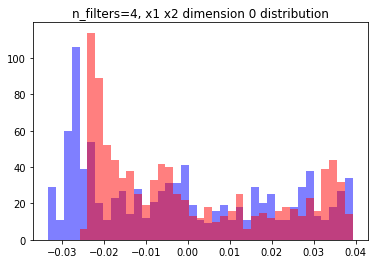

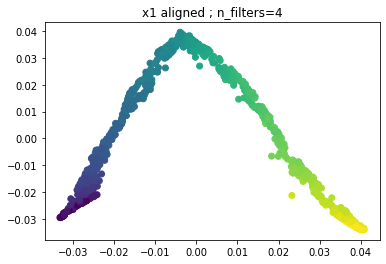

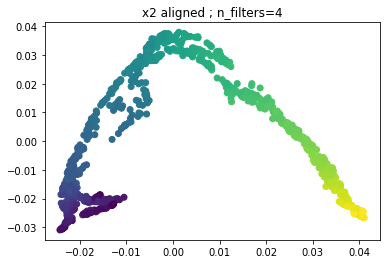

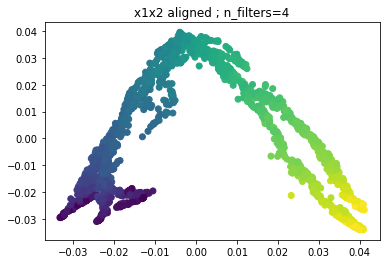

In [130]:
n_filters=4
# align_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
align_op = harmonicalignment.HarmonicAlignment(
            int(n_filters),
            t=1, # 1
            overlap=4,
            verbose=0,
            knn_X=20, # 20
            knn_Y=20, # 20
            knn_XY=10, # 10
            decay_X=20, # 20
            decay_Y=20, # 20
            decay_XY=10, # 10
            n_pca_X=100, # 100
            n_pca_Y=100, # 100
            n_pca_XY=None, # None
        )
align_op.align(x1, x2)
XY_aligned = align_op.diffusion_map()

xb1_aligned=XY_aligned[:1000]
xb2_aligned=XY_aligned[1000:]


_overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


# 分别作图
plt.figure()
plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
plt.title(f'x1 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
plt.title(f'x2 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合


n_filters=8, overlapRatio=0.721


Text(0.5, 1.0, 'x1x2 aligned ; n_filters=8')

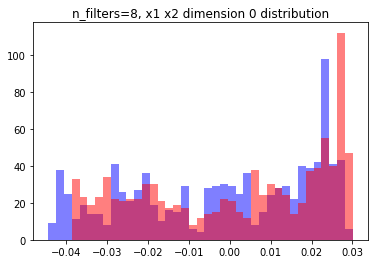

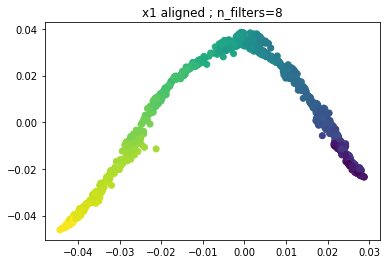

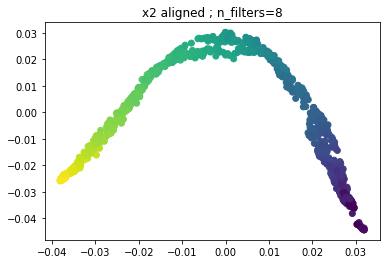

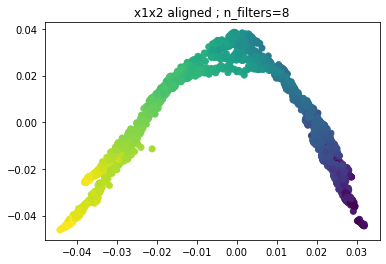

In [137]:
n_filters=8
# align_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
align_op = harmonicalignment.HarmonicAlignment(
            int(n_filters),
            t=1, # 1
            overlap=8,
            verbose=0,
            knn_X=20, # 20
            knn_Y=20, # 20
            knn_XY=10, # 10
            decay_X=20, # 20
            decay_Y=20, # 20
            decay_XY=10, # 10
            n_pca_X=100, # 100
            n_pca_Y=100, # 100
            n_pca_XY=None, # None
        )
align_op.align(x1, x2)
XY_aligned = align_op.diffusion_map()

xb1_aligned=XY_aligned[:1000]
xb2_aligned=XY_aligned[1000:]


_overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


# 分别作图
plt.figure()
plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
plt.title(f'x1 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
plt.title(f'x2 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合


n_filters=16, overlapRatio=0.694


Text(0.5, 1.0, 'x1x2 aligned ; n_filters=16')

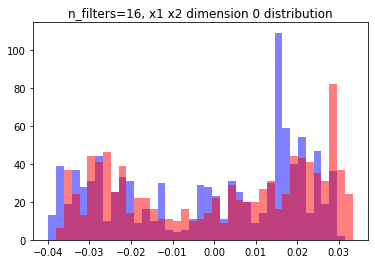

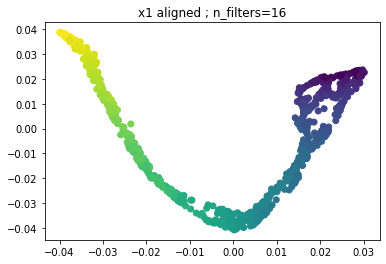

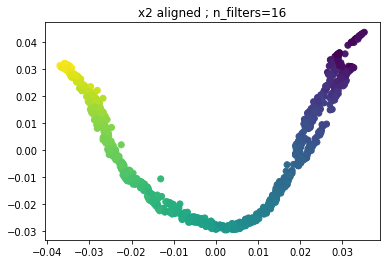

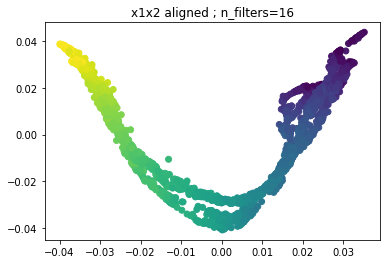

In [136]:
n_filters=16
# align_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
align_op = harmonicalignment.HarmonicAlignment(
            int(n_filters),
            t=1, # 1
            overlap=16,
            verbose=0,
            knn_X=20, # 20
            knn_Y=20, # 20
            knn_XY=10, # 10
            decay_X=20, # 20
            decay_Y=20, # 20
            decay_XY=10, # 10
            n_pca_X=100, # 100
            n_pca_Y=100, # 100
            n_pca_XY=None, # None
        )
align_op.align(x1, x2)
XY_aligned = align_op.diffusion_map()

xb1_aligned=XY_aligned[:1000]
xb2_aligned=XY_aligned[1000:]


_overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


# 分别作图
plt.figure()
plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
plt.title(f'x1 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
plt.title(f'x2 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合


n_filters=64, overlapRatio=0.46


Text(0.5, 1.0, 'x1x2 aligned ; n_filters=64')

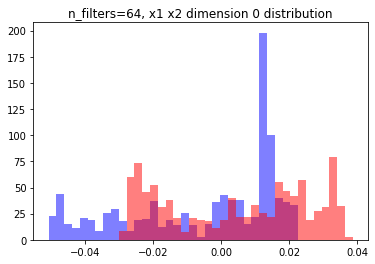

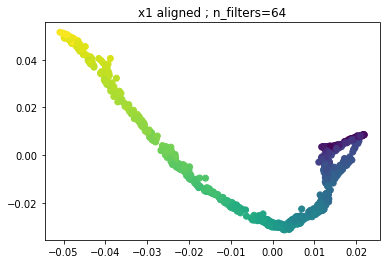

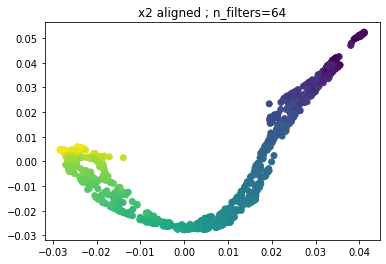

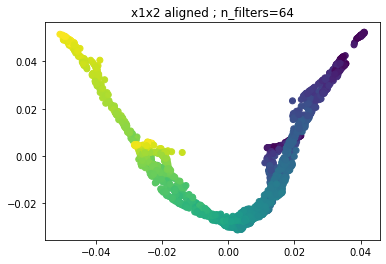

In [138]:
n_filters=64
# align_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
align_op = harmonicalignment.HarmonicAlignment(
            int(n_filters),
            t=1, # 1
            overlap=64,
            verbose=0,
            knn_X=20, # 20
            knn_Y=20, # 20
            knn_XY=10, # 10
            decay_X=20, # 20
            decay_Y=20, # 20
            decay_XY=10, # 10
            n_pca_X=100, # 100
            n_pca_Y=100, # 100
            n_pca_XY=None, # None
        )
align_op.align(x1, x2)
XY_aligned = align_op.diffusion_map()

xb1_aligned=XY_aligned[:1000]
xb2_aligned=XY_aligned[1000:]


_overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


# 分别作图
plt.figure()
plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
plt.title(f'x1 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
plt.title(f'x2 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合


n_filters=8, overlapRatio=0.663


Text(0.5, 1.0, 'x1x2 aligned ; n_filters=8')

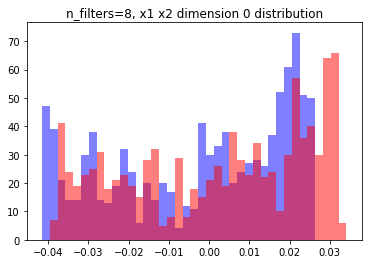

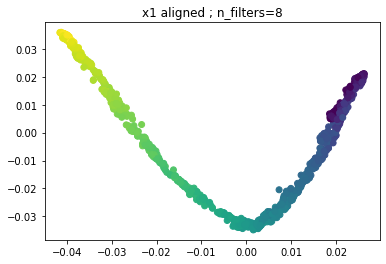

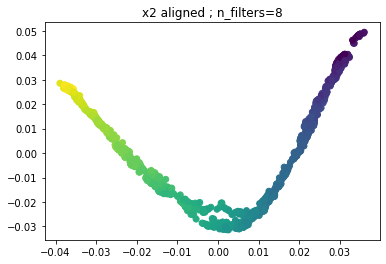

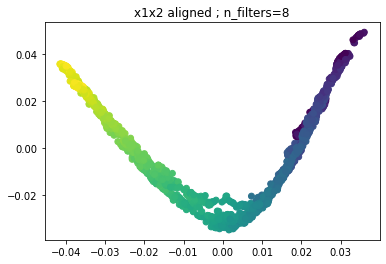

In [141]:
n_filters=8
# align_op = harmonicalignment.HarmonicAlignment(n_filters=int(n_filters))
align_op = harmonicalignment.HarmonicAlignment(
            int(n_filters),
            t=1, # 1
            overlap=n_filters,
            verbose=0,
            knn_X=20, # 20
            knn_Y=20, # 20
            knn_XY=10, # 10
            decay_X=20, # 20
            decay_Y=20, # 20
            decay_XY=10, # 10
            n_pca_X=100, # 100
            n_pca_Y=100, # 100
            n_pca_XY=None, # None
        )
align_op.align(x1, x2)
XY_aligned = align_op.diffusion_map()

xb1_aligned=XY_aligned[:1000]
xb2_aligned=XY_aligned[1000:]


_overlapRatio = overlapRatio(xb1_aligned,xb2_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


# 分别作图
plt.figure()
plt.scatter(xb1_aligned[:,0],xb1_aligned[:,1],c=label1)
plt.title(f'x1 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(xb2_aligned[:,0],xb2_aligned[:,1],c=label2)
plt.title(f'x2 aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1],c=label[:])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合
